In [2]:
import numpy as np
import glob
import json
import matplotlib as mpl
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
import mplhep
import matplotlib.colors as mcolors
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)
import pandas as pd

mplhep.style.use(mplhep.style.CMS)

In [3]:
def jsonload(fname):
    with open(fname) as jsonfile:
        try:
            return json.load(jsonfile)
        except Exception:
            print(fname)

In [4]:
fdir = "/Users/alexcampbell/documents/research/Fermilab/packaged_Sep_21_2023"
fnames = list(np.sort(glob.glob(f"{fdir}/*.json")))
all_files = fnames.copy()

In [5]:
data = [jsonload(fname) for fname in fnames]

for i in range(len(data)):
    if data[i] == None:
        data.remove(data[i])

In [12]:
for i in range(len(data[0]['tests'])):
    print(data[0]['tests'][i]['nodeid'])

test_i2c.py::test_rw_allregisters[0]
test_i2c.py::test_rw_allregisters[255]
test_i2c.py::test_hard_reset_i2c_allregisters
test_i2c.py::test_soft_reset_i2c_allregisters
test_i2c.py::test_wrong_reg_address
test_i2c.py::test_alladdresses[0]
test_i2c.py::test_alladdresses[1]
test_i2c.py::test_alladdresses[2]
test_i2c.py::test_alladdresses[3]
test_i2c.py::test_alladdresses[4]
test_i2c.py::test_alladdresses[5]
test_i2c.py::test_alladdresses[6]
test_i2c.py::test_alladdresses[7]
test_i2c.py::test_alladdresses[8]
test_i2c.py::test_alladdresses[9]
test_i2c.py::test_alladdresses[10]
test_i2c.py::test_alladdresses[11]
test_i2c.py::test_alladdresses[12]
test_i2c.py::test_alladdresses[13]
test_i2c.py::test_alladdresses[14]
test_i2c.py::test_alladdresses[15]
test_i2c.py::test_wrong_i2c_address
test_i2c.py::test_hold_hard_reset
test_i2c.py::test_hold_soft_reset
test_i2c.py::test_chip_sync
test_i2c.py::test_same_address
test_io.py::test_softreset
test_io.py::test_hardreset
test_io.py::test_fclock
test_

# eRx Results

In [6]:
erx_errcounts = []
maxwidth = []
second_max_width = []
for i in range(len(data)):
    for j in range(len(data[i]['tests'])):
        if 'metadata' in data[i]['tests'][j]:
            if "test_io.py::test_ePortRXPRBS" in data[i]['tests'][j]['nodeid']:
                erx_errcounts.append(data[i]['tests'][j]['metadata']['eRX_errcounts'])
                maxwidth.append(data[i]['tests'][j]['metadata']['maxwidth'])
                second_max_width.append(data[i]['tests'][j]['metadata']['second_max_width'])
erx_errcounts = np.array(erx_errcounts)

In [13]:
erx_errcounts[0]

array([[  0,  50,   0,   0,   0,   0,   0,   0,   0, 255, 255, 255],
       [255, 255,   0, 134,   0,   0,   0,   0,   0, 255, 255, 255],
       [255, 255, 255, 255, 255,   0,   0,   0,   0,   0,   0, 241],
       [255,   0, 255, 255, 255,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,  34,  21, 255, 255, 255,   0,   6,   0,   0,   0],
       [  0,   0,   0,   0,   0, 255, 255, 255, 255,   0,   0,   0],
       [  0,   0,   0,   0,   0, 255,  90, 255, 255,   1,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 255, 255, 255, 255,   4],
       [  0, 238,   0,   0,   0,   0,   0,   0,   0, 255, 255, 255],
       [255, 255,   0,  27,   0,   0,   0,   0,   0, 255, 255, 255],
       [255, 255, 255, 255, 255,   0,   0,   0,   0,   0,   0,  13],
       [255,   0, 255, 255, 255,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 255, 255, 255,   0, 191,   0,   0,   0],
       [  0,   0,   0,   0,   1, 255, 255, 255, 255,   0,   0,   0],
       [  0,   0,   0,   0,   0, 2

In [94]:
maxwidth = np.array(maxwidth)
second_max_width = np.array(second_max_width)

In [ ]:
temp = maxwidth.flatten()
temp1 = second_max_width.flatten()
plt.hist(temp, label = "eRx Max Width")
plt.hist(temp1, linewidth = 3, histtype = 'step', label = "eRx 2nd Max Width")
plt.xlabel("Phase Width")
plt.ylabel("Number of eRx")
plt.title("ECON-D eRx Width")
plt.legend(loc= "upper left")
plt.savefig(f'/Users/alexcampbell/documents/research/Fermilab/packaged_Sep_21_2023/plots/prbs/distribution_of_eRx_widths.png', dpi=300, facecolor = "w")

In [ ]:
ch1 = maxwidth[:,0]
ch2 = maxwidth[:,1]
ch3 = maxwidth[:,2]
ch4 = maxwidth[:,3]
ch5 = maxwidth[:,4]
ch6 = maxwidth[:,5]
ch7 = maxwidth[:,6]
ch8 = maxwidth[:,7]
ch9 = maxwidth[:,8]
ch10 = maxwidth[:,9]
ch11 = maxwidth[:,10]
ch12 = maxwidth[:,11]
temp = [ch1,ch2,ch3,ch4,ch5,ch6,ch7,ch8,ch9,ch10,ch11,ch12]
plt.violinplot(temp, showmeans=True, showextrema=True)
plt.xticks(range(13), ['0','1', '2', '3' ,'4', '5', '6',
                              '7', '8', '9', '10', '11', '12'])
plt.title("ECON-D Max phase width of each eRx")
plt.yticks(np.arange(0,10,0.5))
plt.grid(color='r', linestyle='--', linewidth=.3)
# Set the y-axis label
plt.ylabel('Max width')
plt.xlabel('Channel')
plt.savefig(f'/Users/alexcampbell/documents/research/Fermilab/packaged_Sep_21_2023/plots/prbs/max_width_volin_of_all_eRx.png', dpi=300, facecolor = "w")


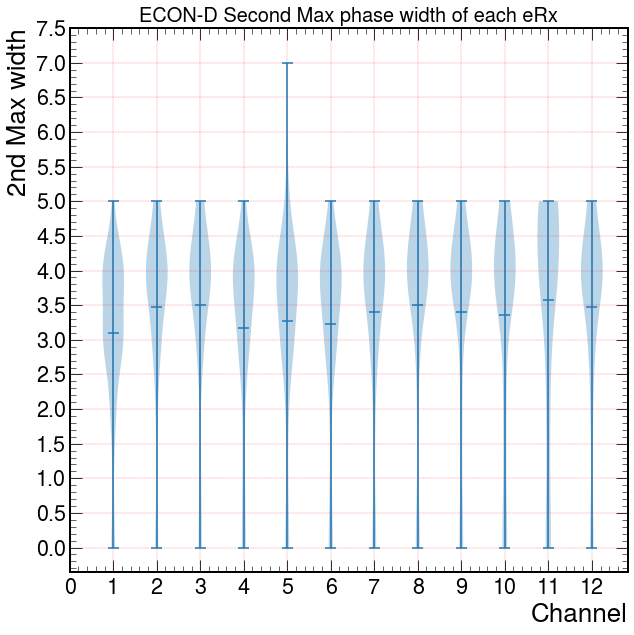

In [122]:
ch1 = second_max_width[:,0]
ch2 = second_max_width[:,1]
ch3 = second_max_width[:,2]
ch4 = second_max_width[:,3]
ch5 = second_max_width[:,4]
ch6 = second_max_width[:,5]
ch7 = second_max_width[:,6]
ch8 = second_max_width[:,7]
ch9 = second_max_width[:,8]
ch10 = second_max_width[:,9]
ch11 = second_max_width[:,10]
ch12 = second_max_width[:,11]
temp = [ch1,ch2,ch3,ch4,ch5,ch6,ch7,ch8,ch9,ch10,ch11,ch12]
plt.violinplot(temp, showmeans=True, showextrema=True)
plt.xticks(range(13), ['0','1', '2', '3' ,'4', '5', '6',
                              '7', '8', '9', '10', '11', '12'])
plt.title("ECON-D Second Max phase width of each eRx", size=20)
plt.yticks(np.arange(0,8,0.5))
plt.grid(color='r', linestyle='--', linewidth=.3)
# Set the y-axis label
plt.ylabel('2nd Max width')
plt.xlabel('Channel')
plt.savefig(f'/Users/alexcampbell/documents/research/Fermilab/packaged_Sep_21_2023/plots/prbs/second_max_width_volin_of_all_eRx.png', dpi=300, facecolor = "w")


/var/folders/pj/jdsydbt93y3fty8bxll08bd00000gn/T/ipykernel_8682/341633563.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig,ax=plt.subplots(figsize=(7,5))


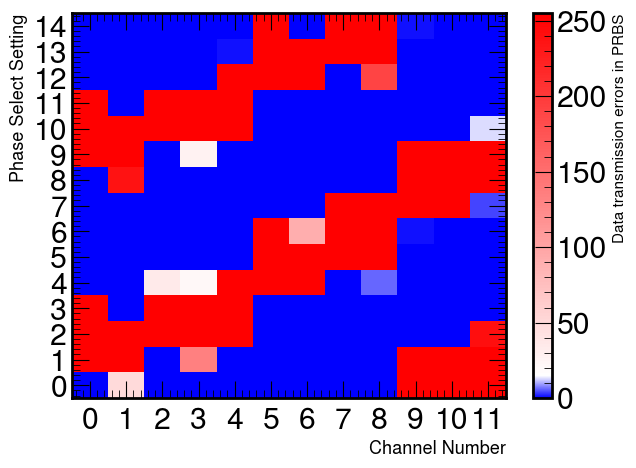

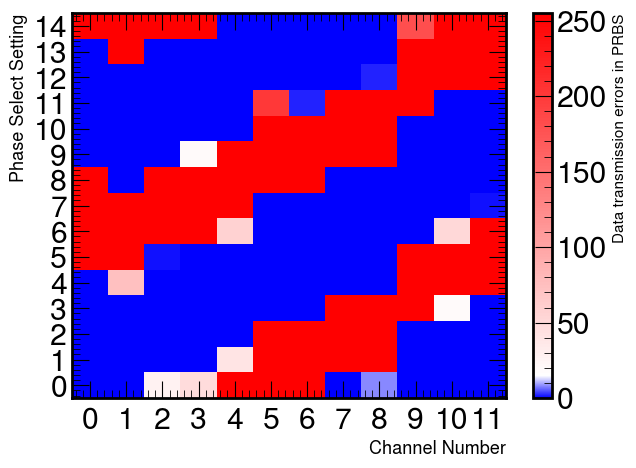

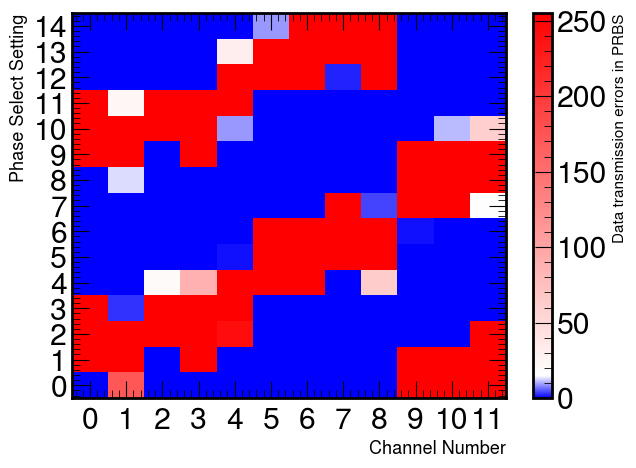

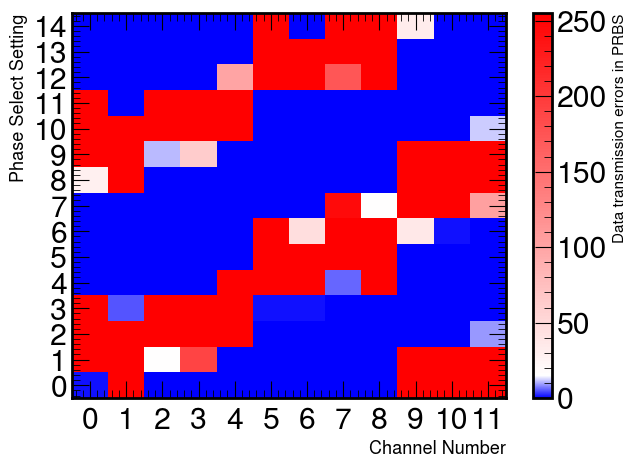

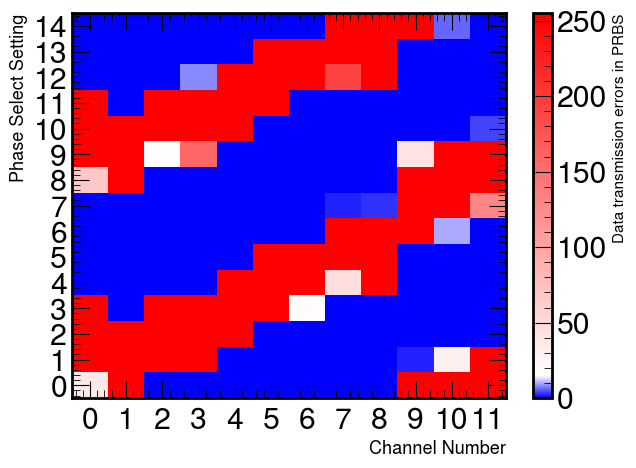

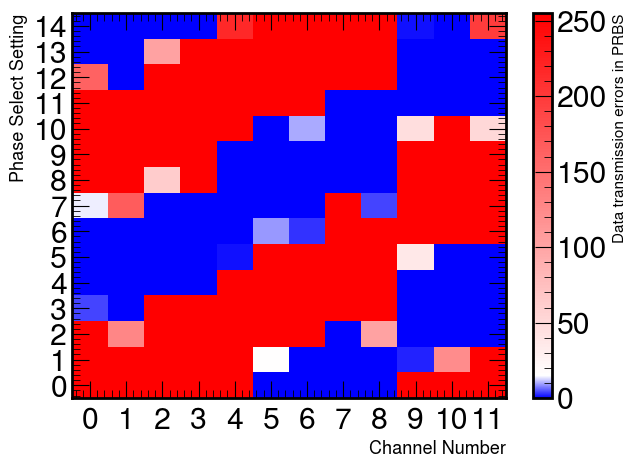

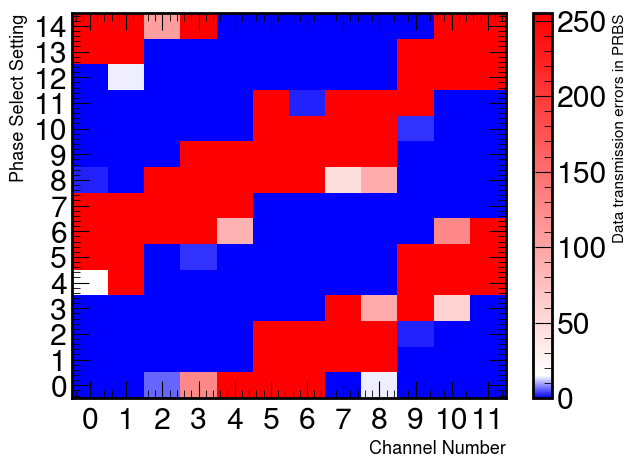

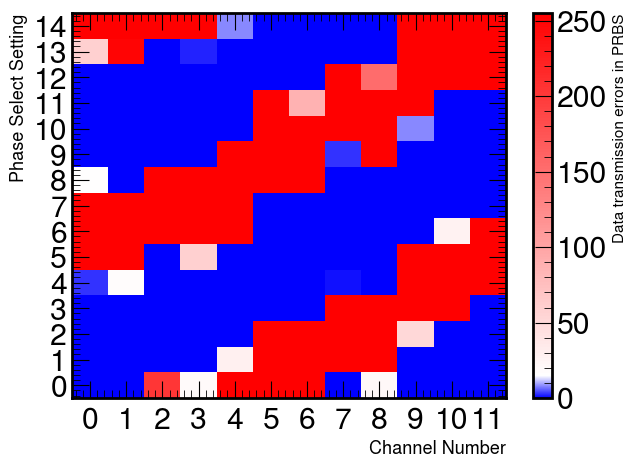

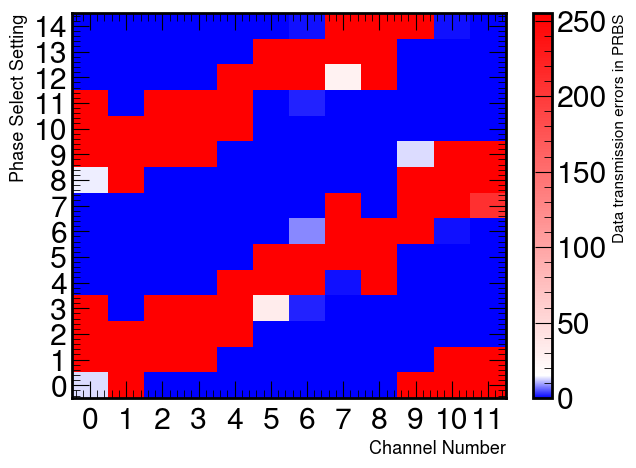

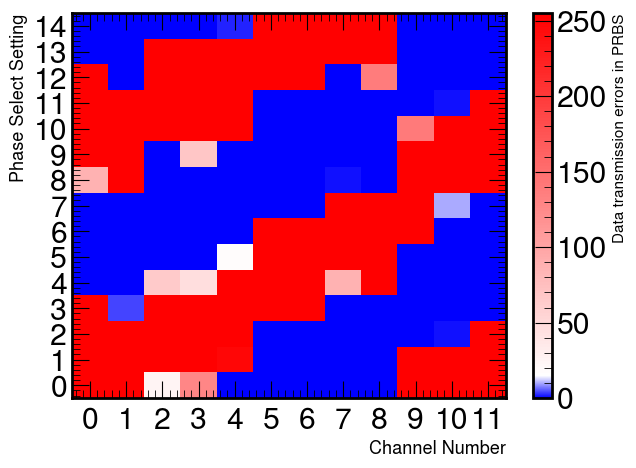

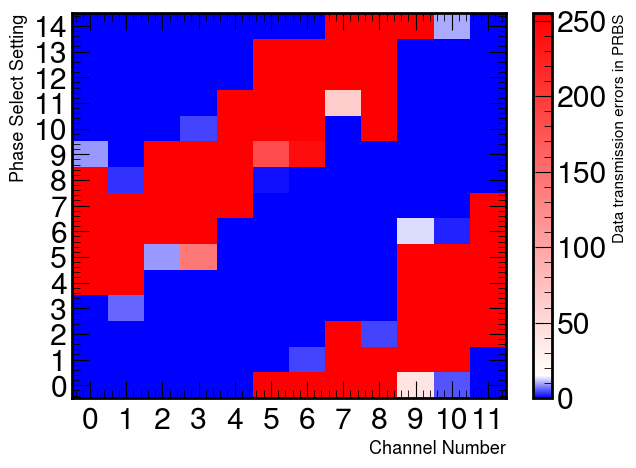

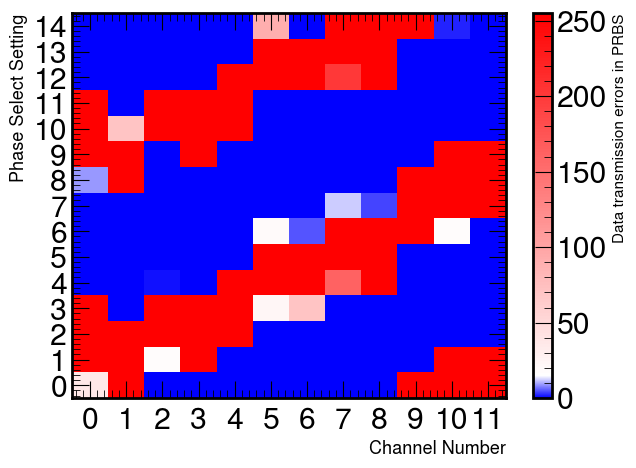

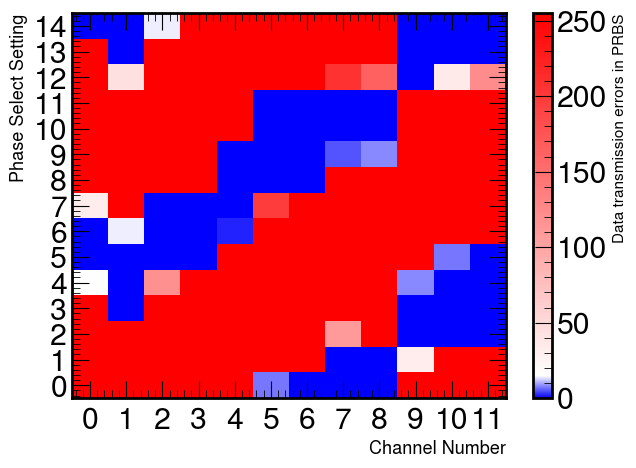

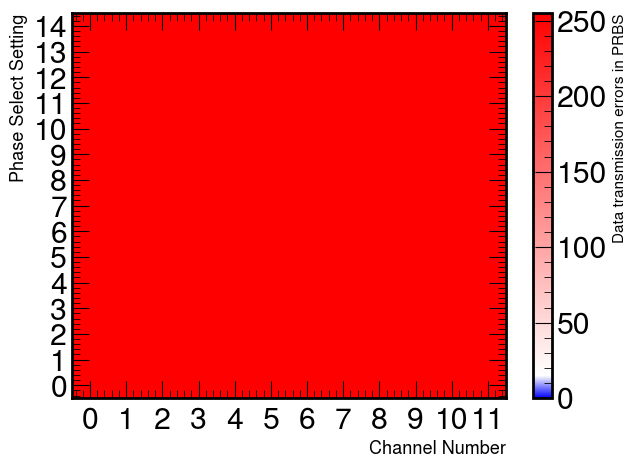

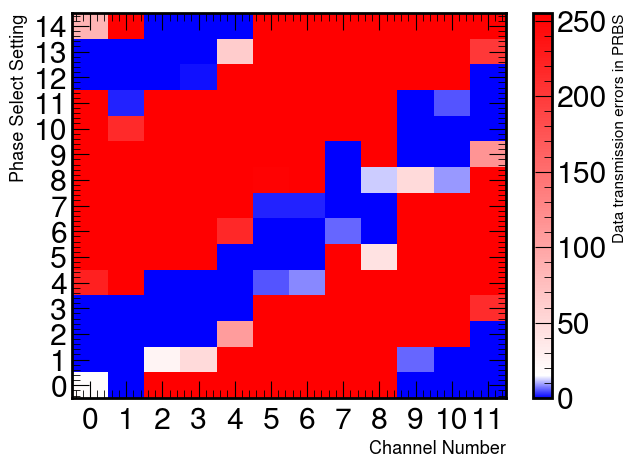

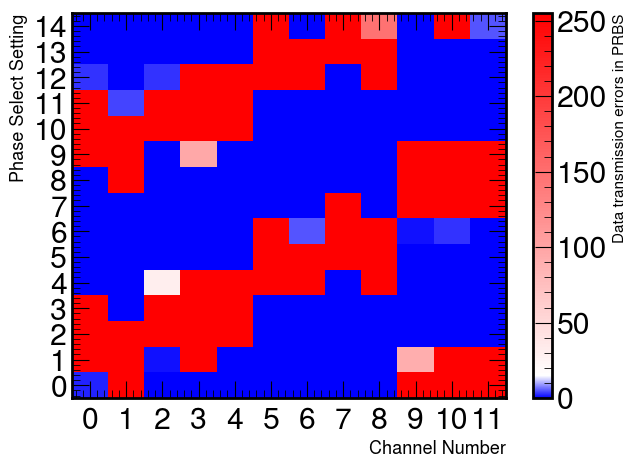

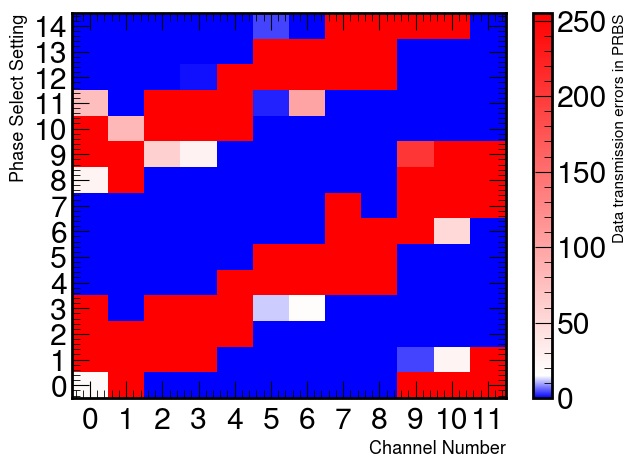

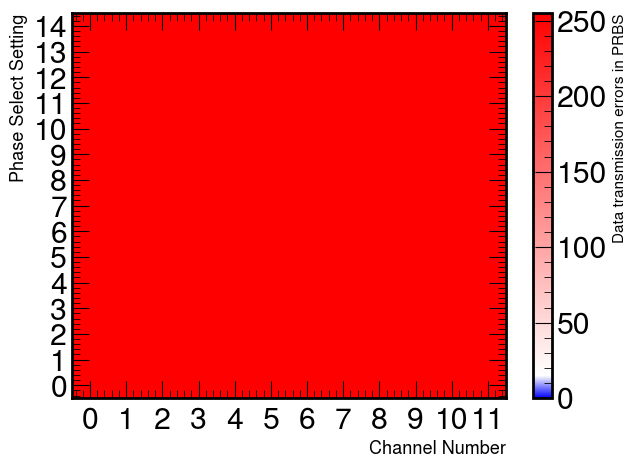

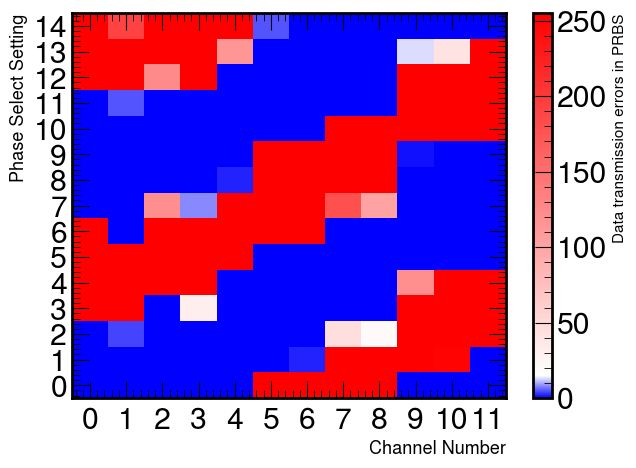

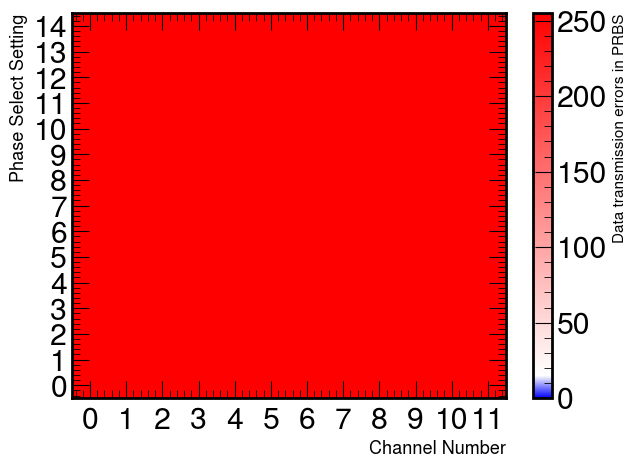

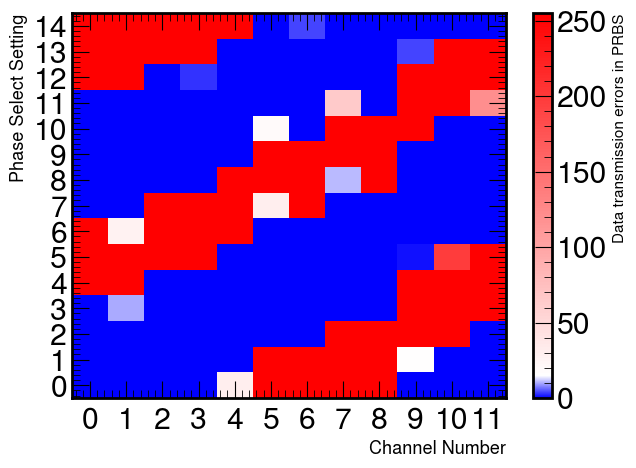

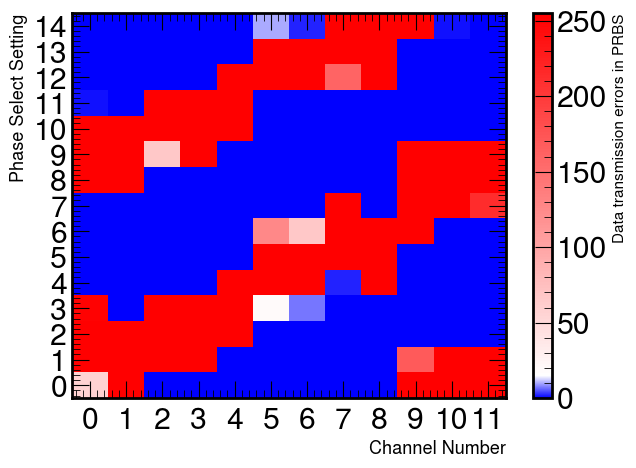

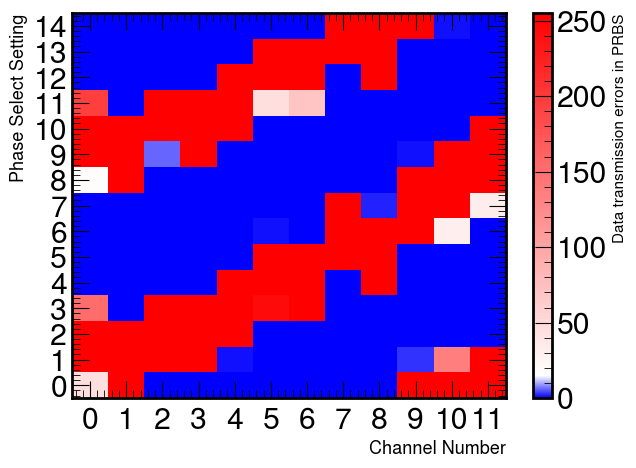

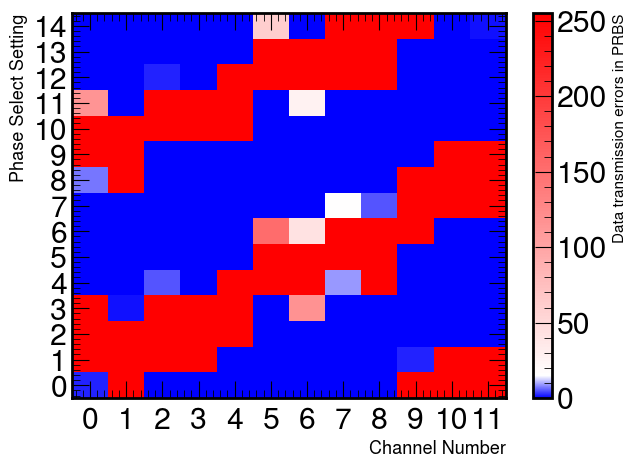

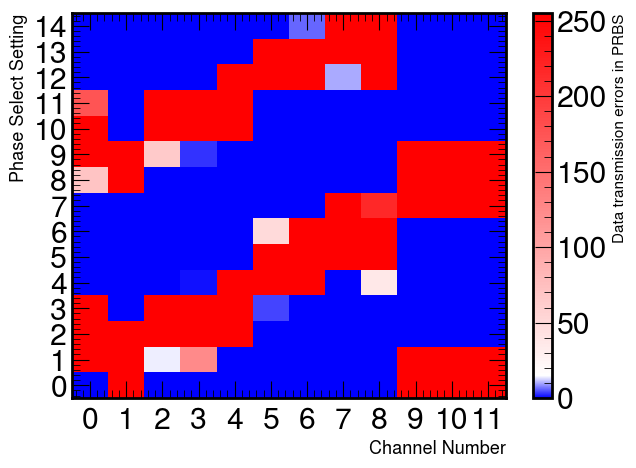

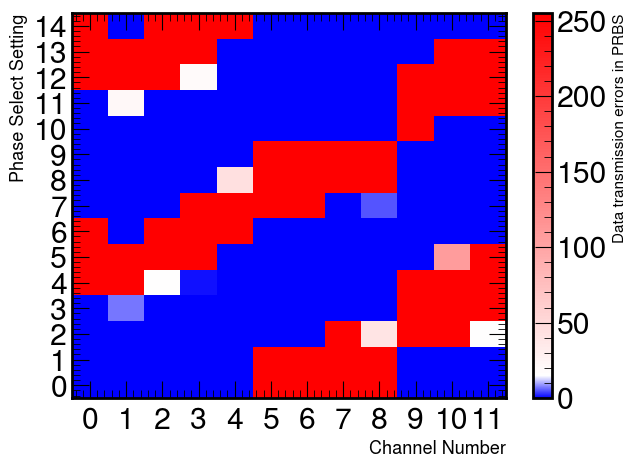

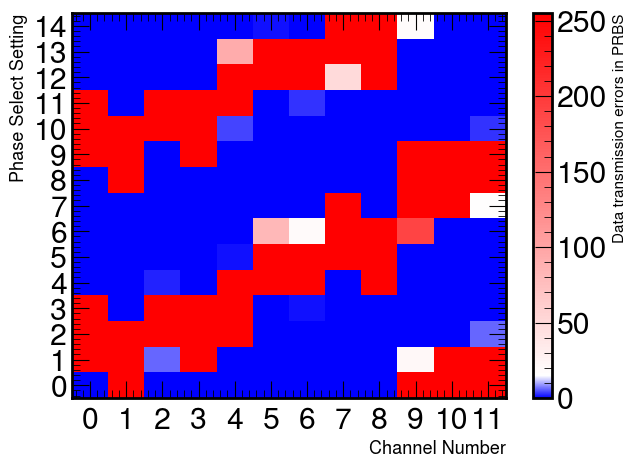

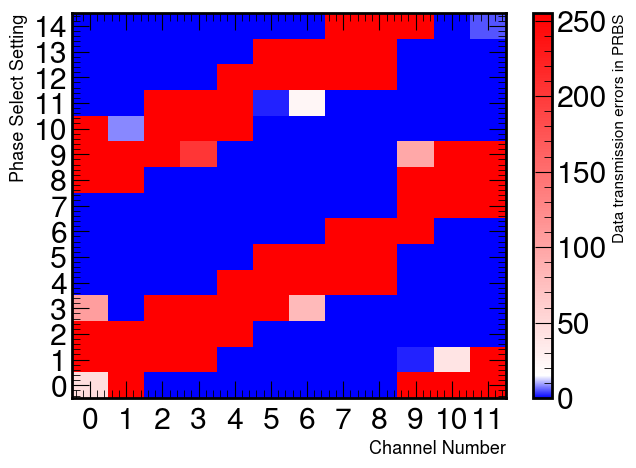

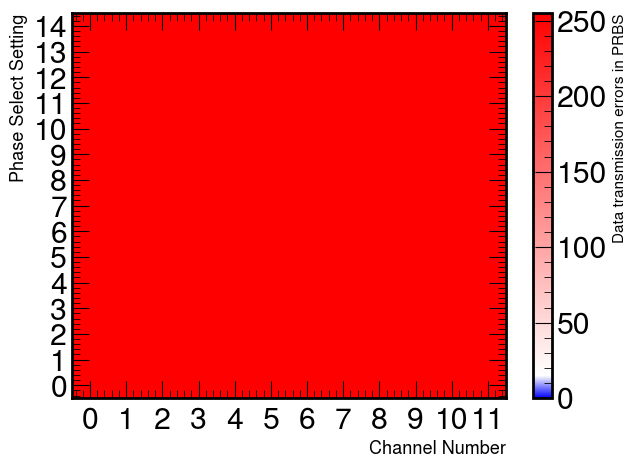

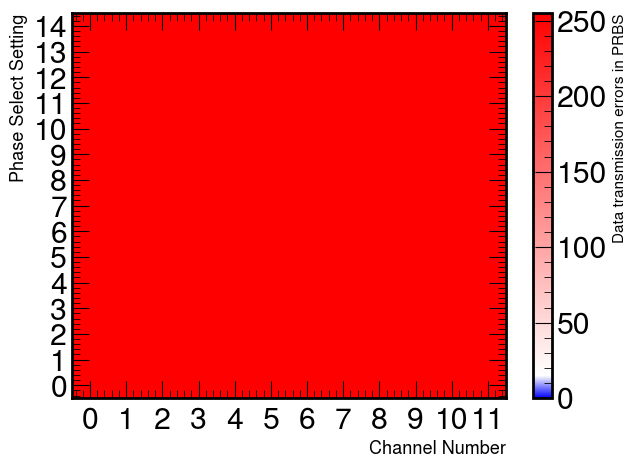

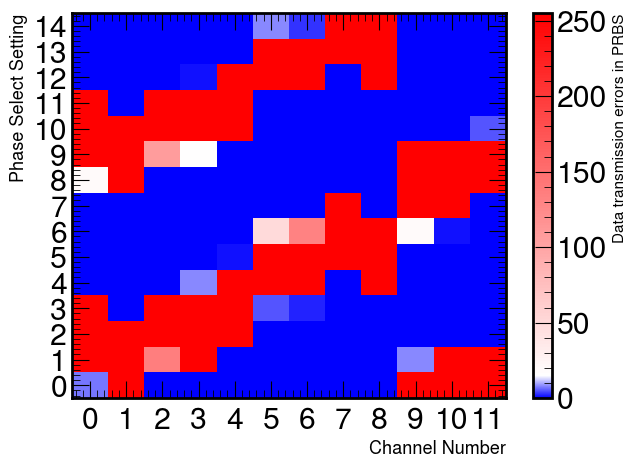

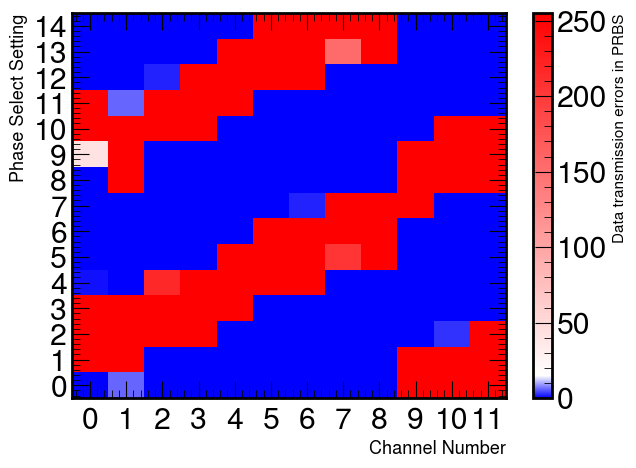

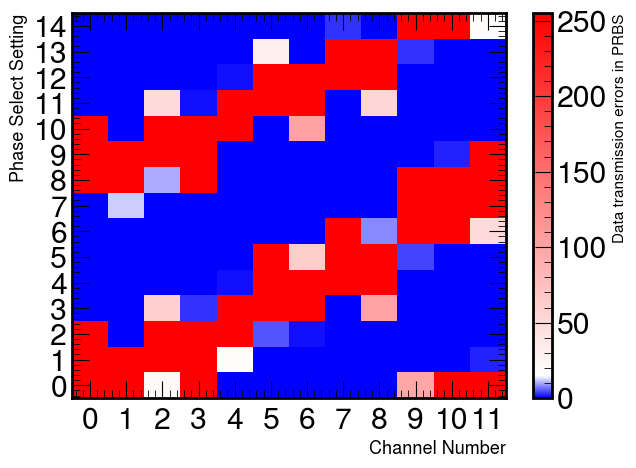

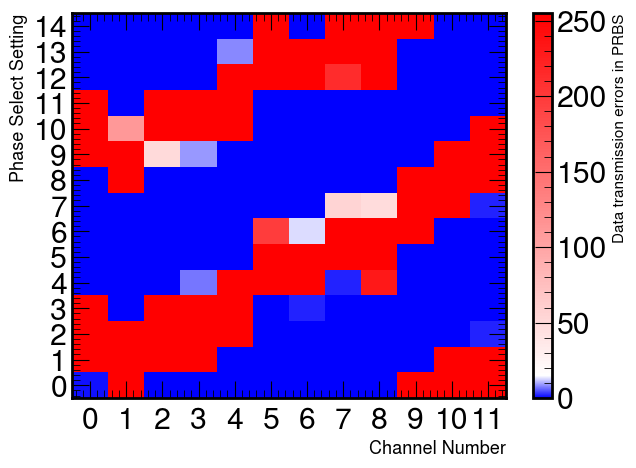

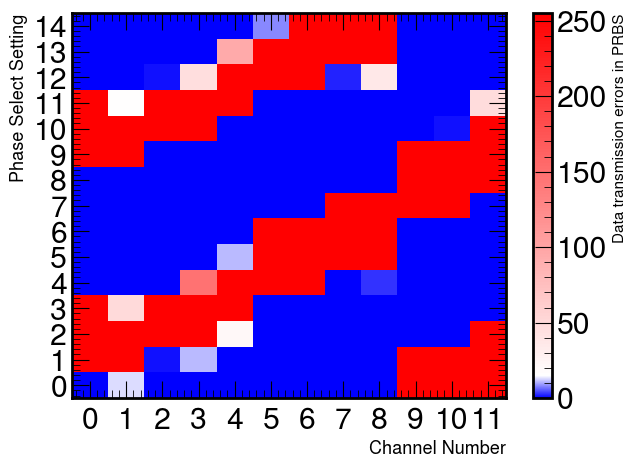

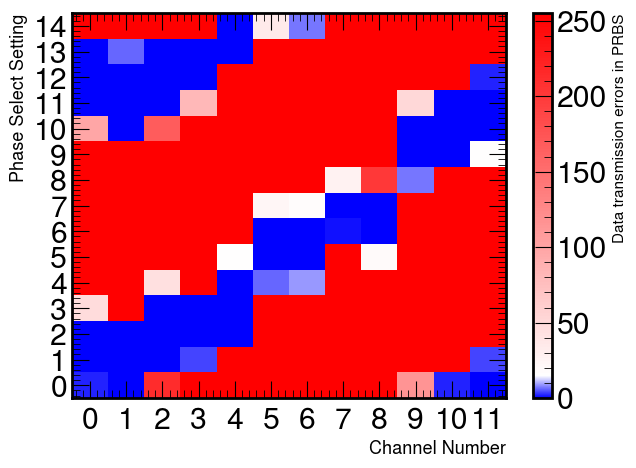

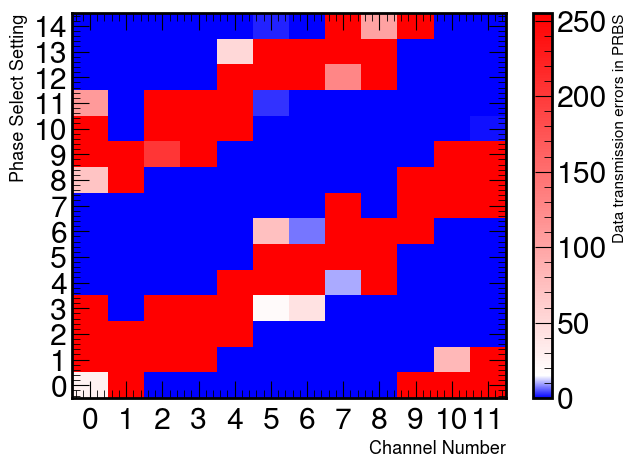

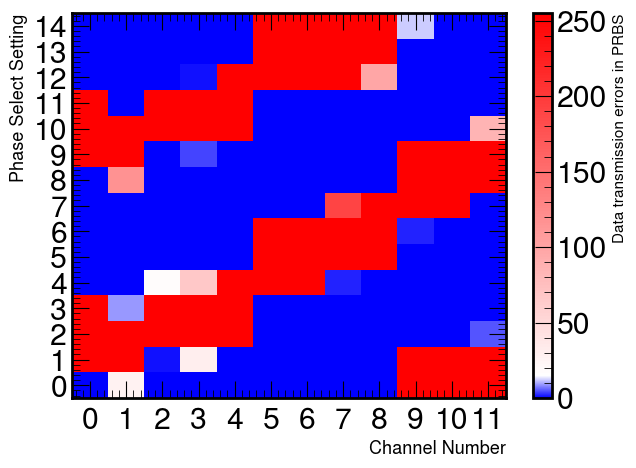

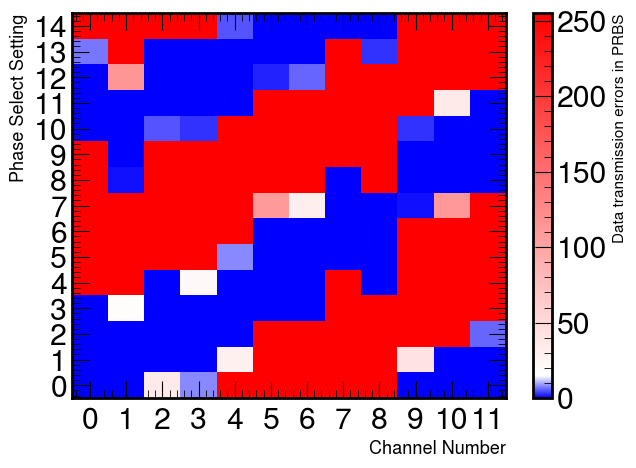

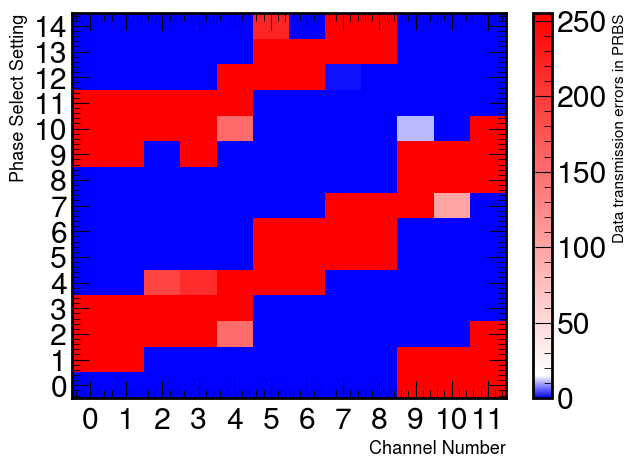

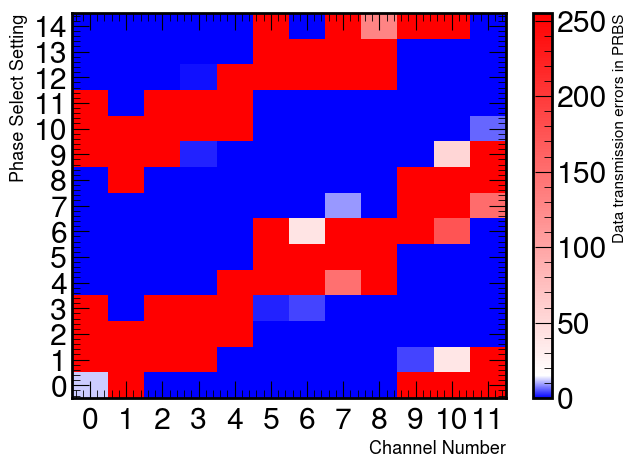

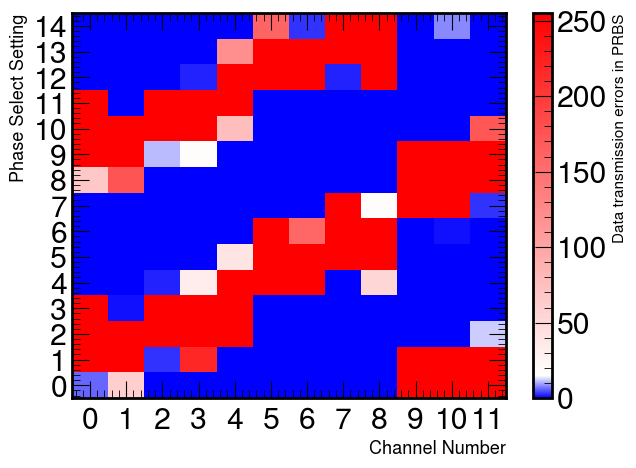

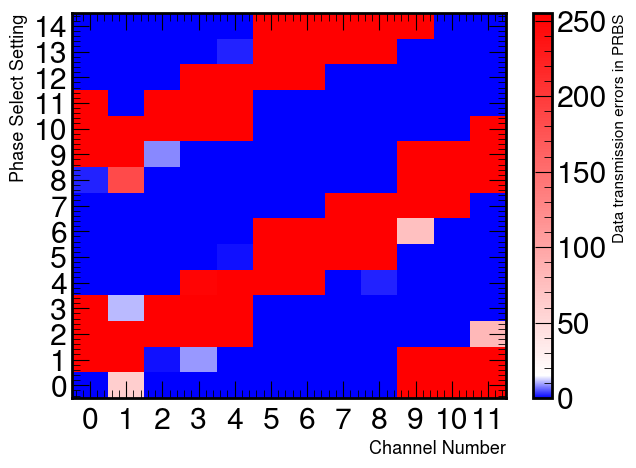

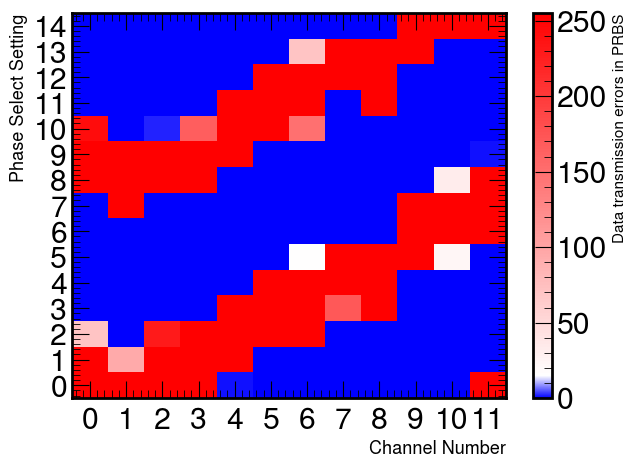

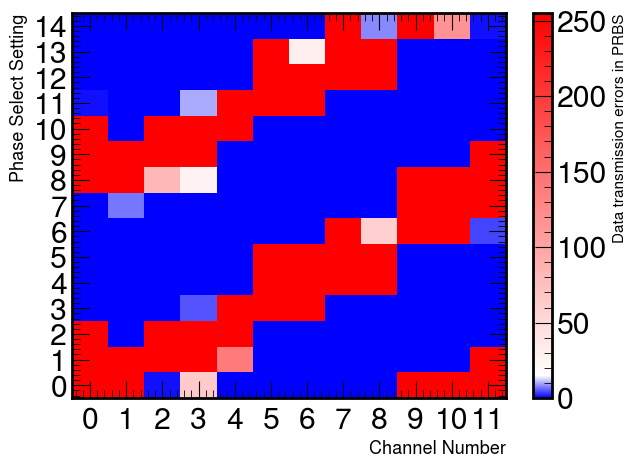

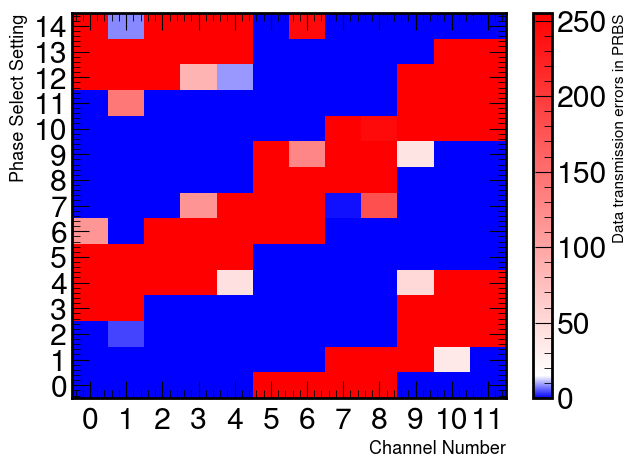

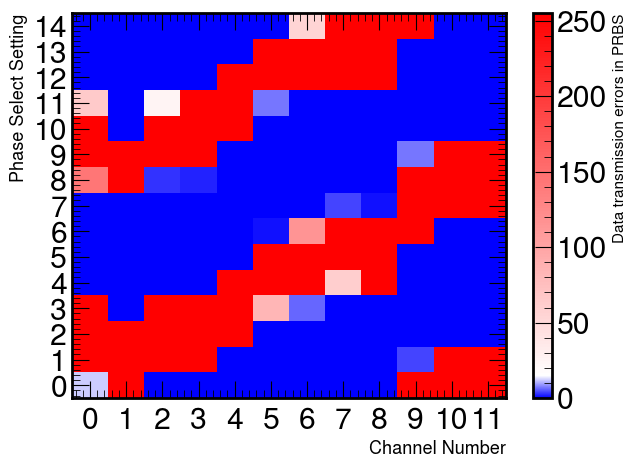

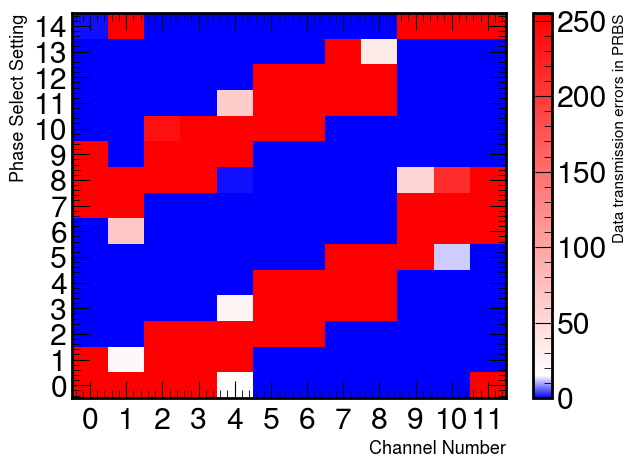

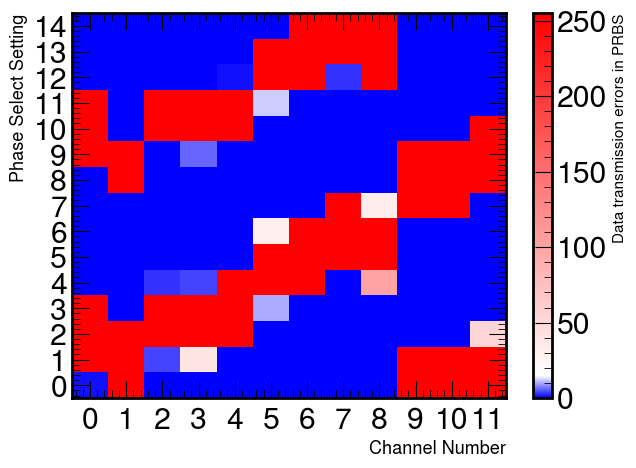

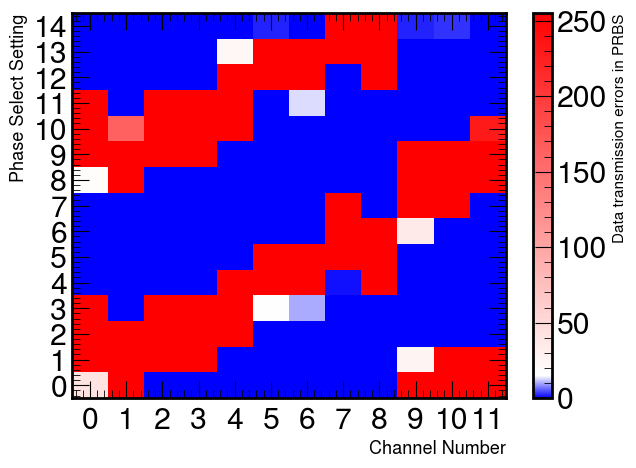

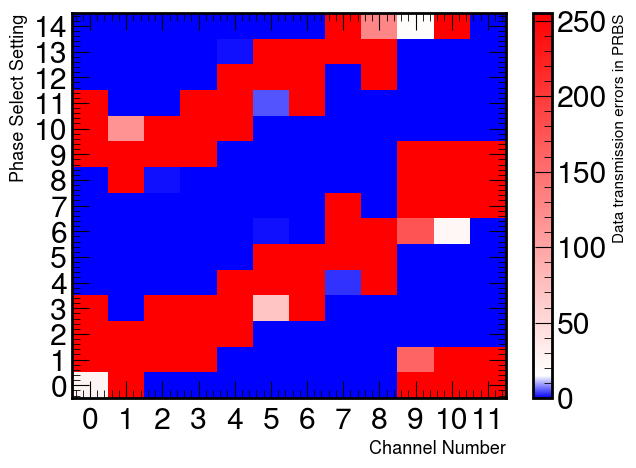

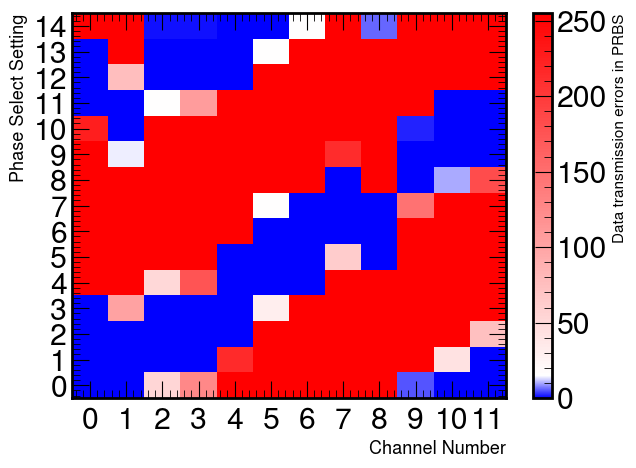

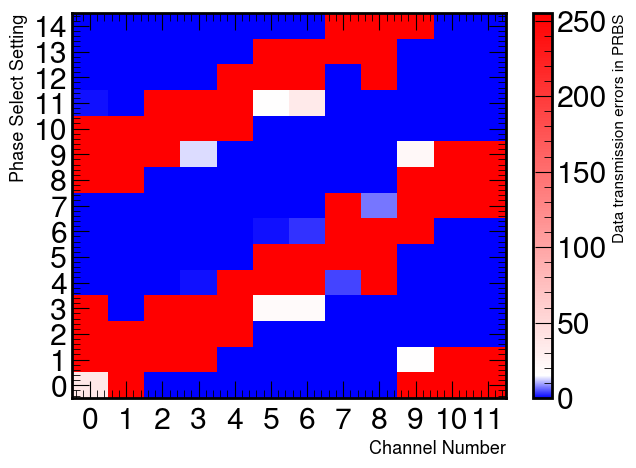

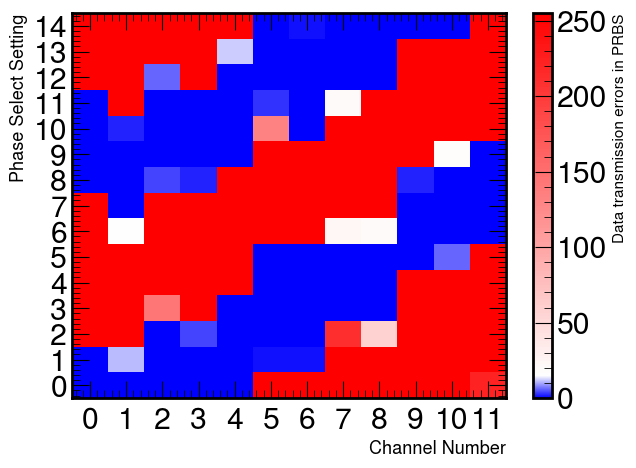

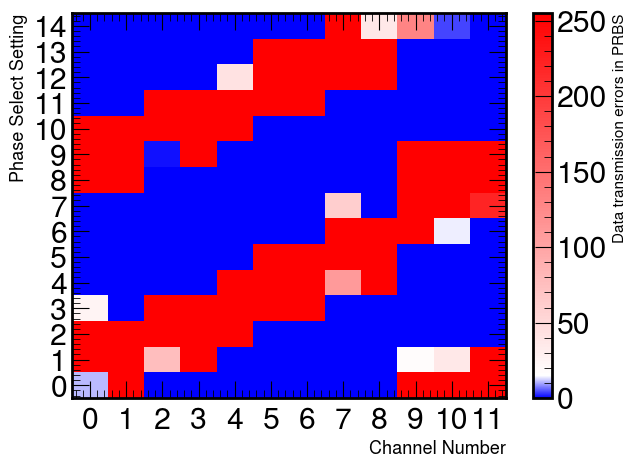

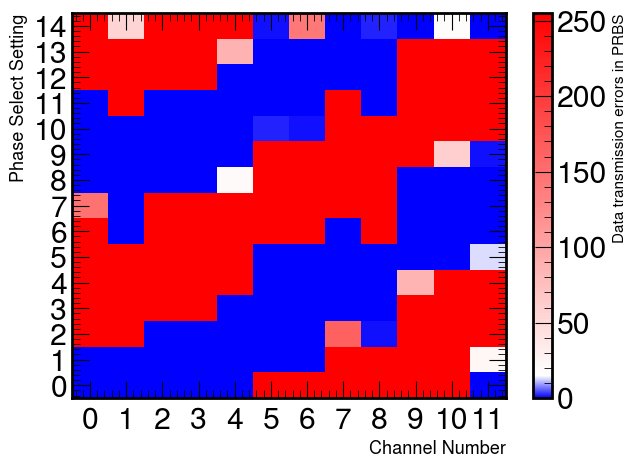

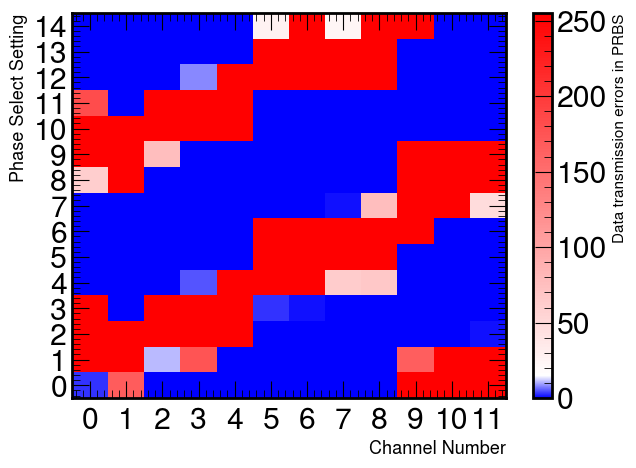

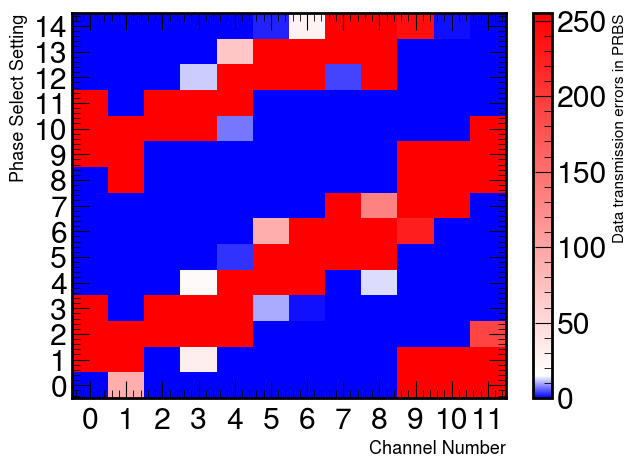

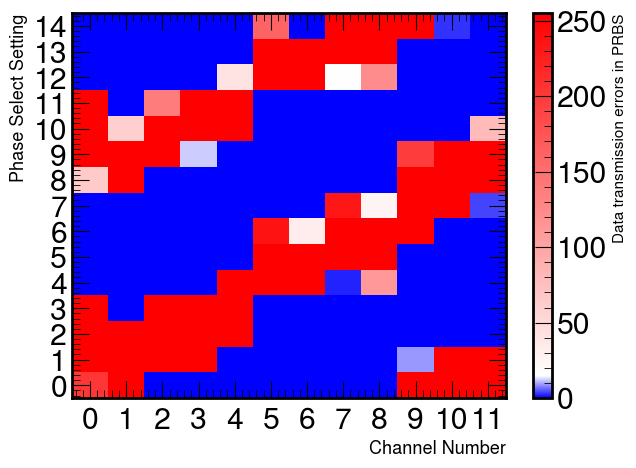

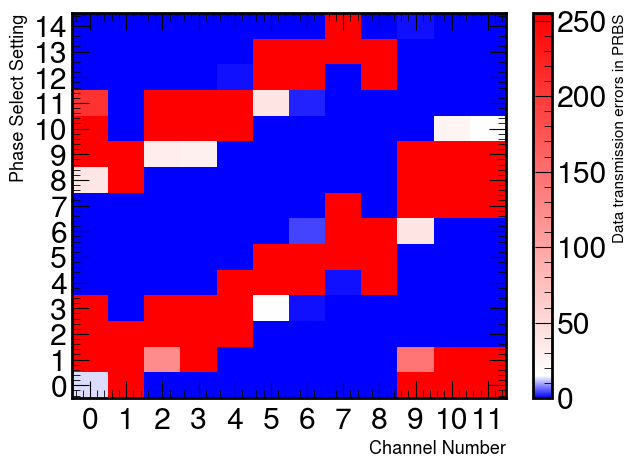

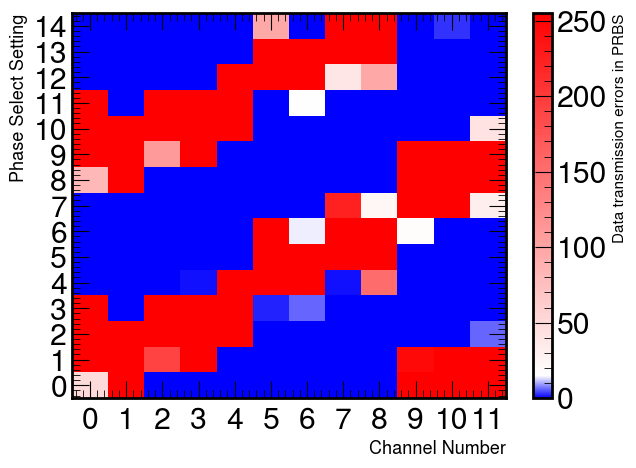

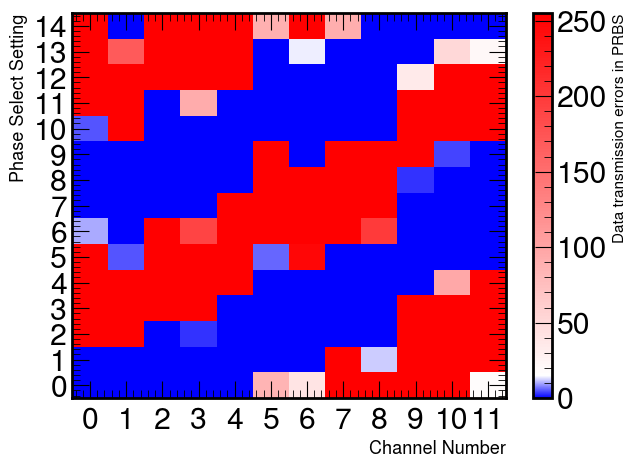

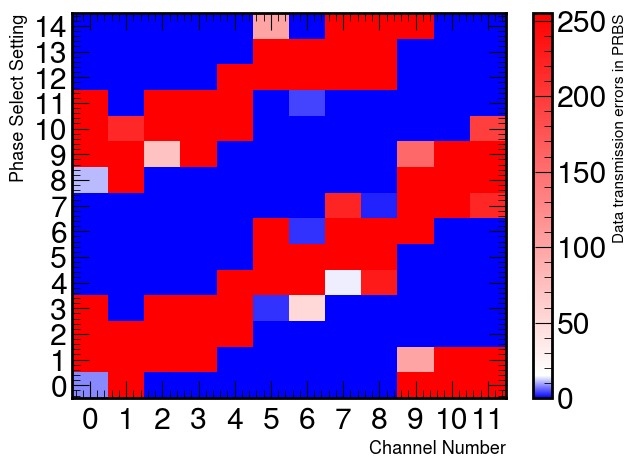

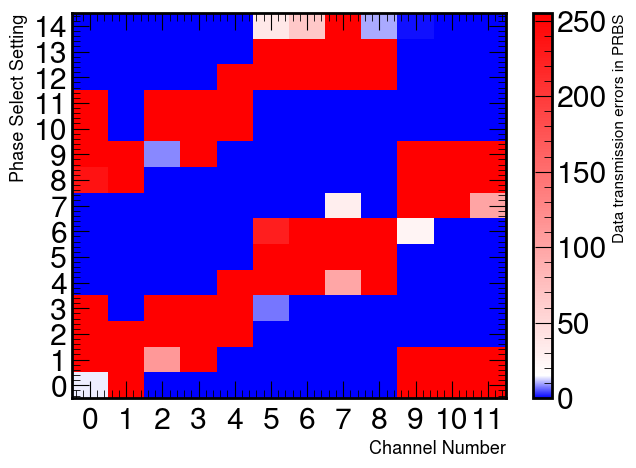

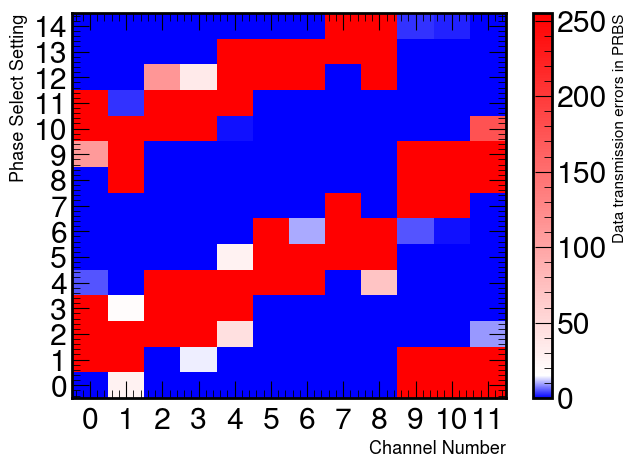

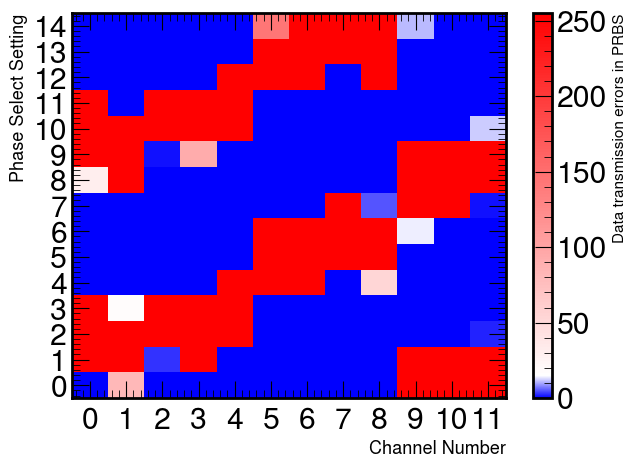

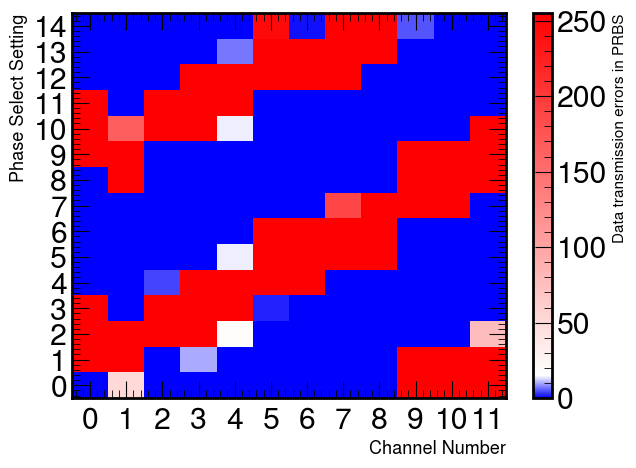

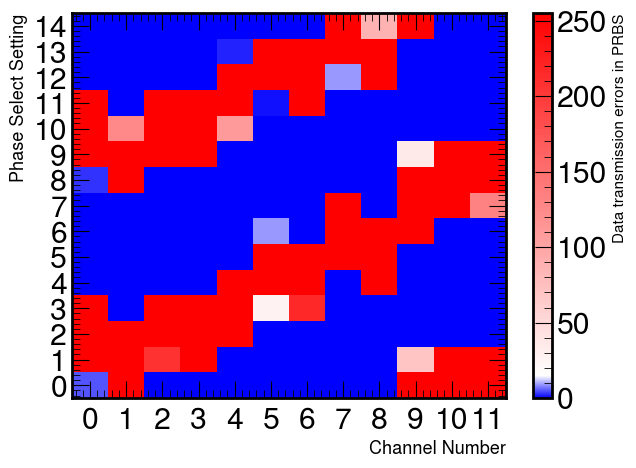

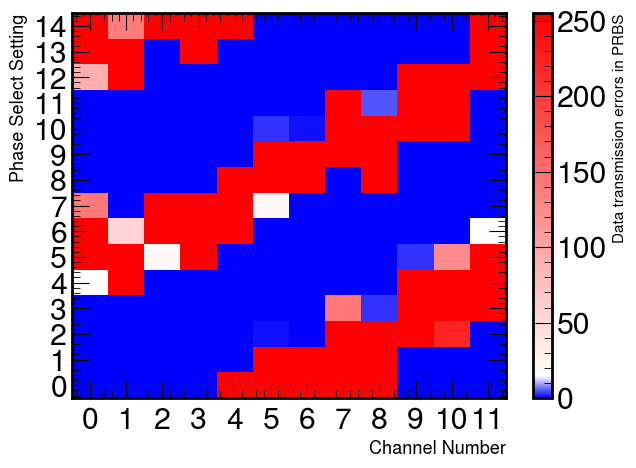

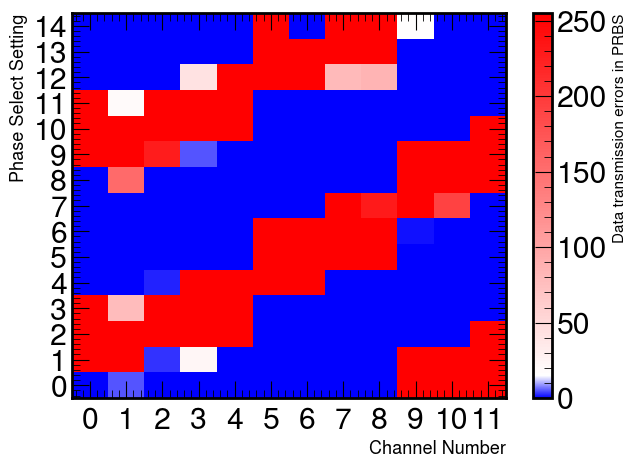

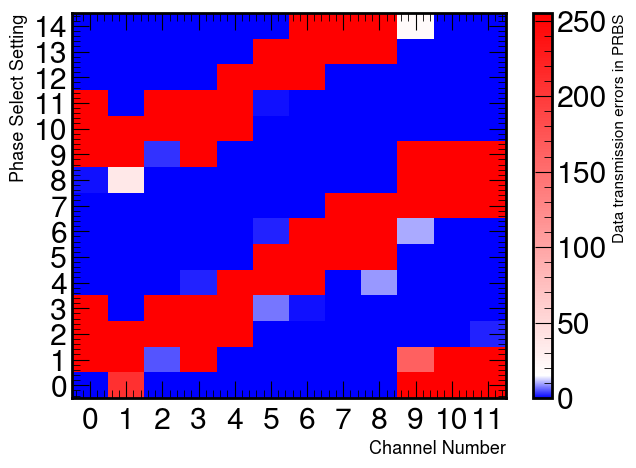

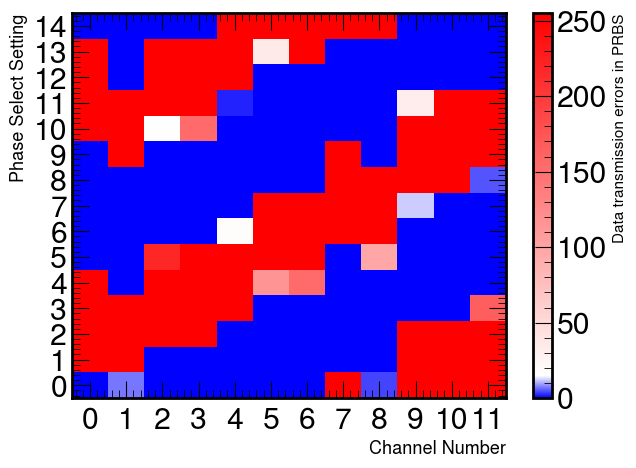

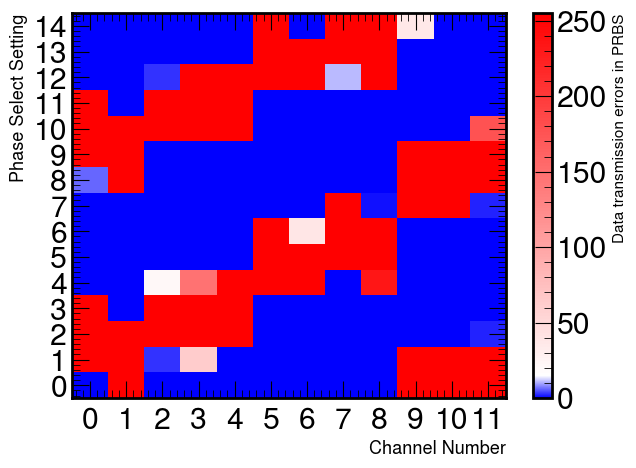

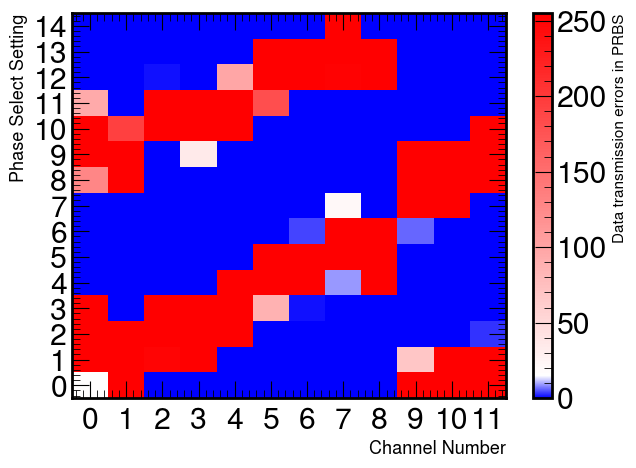

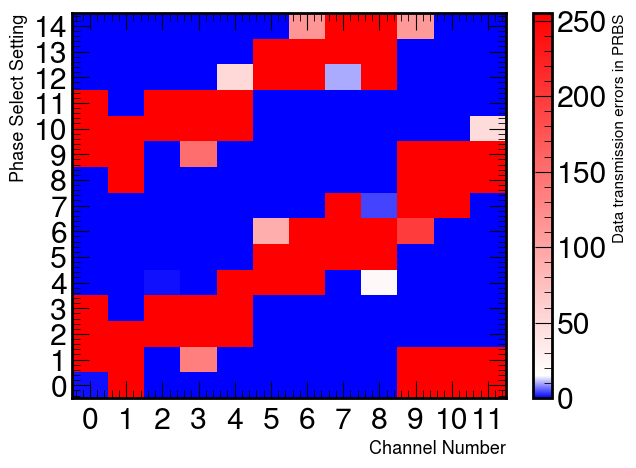

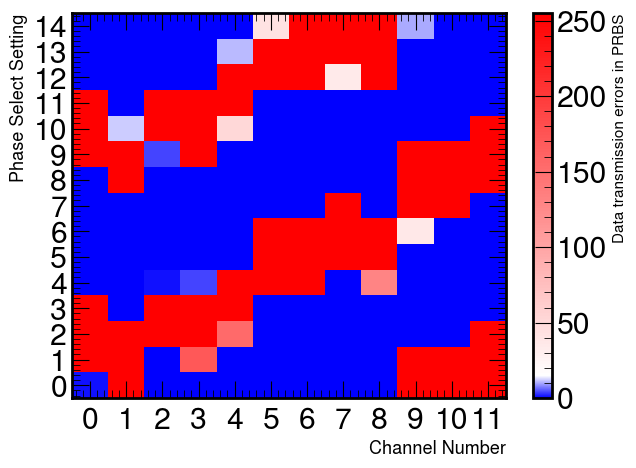

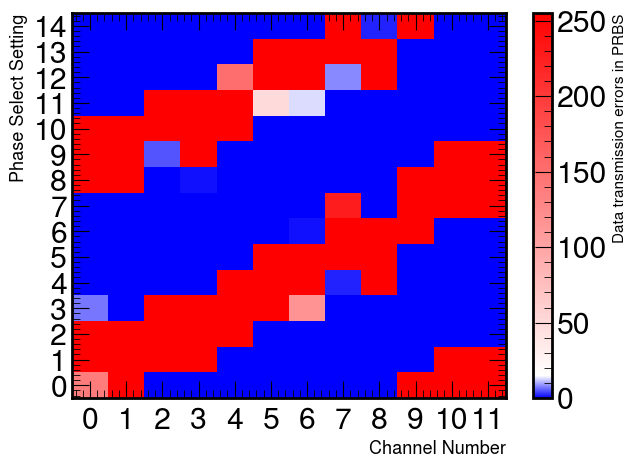

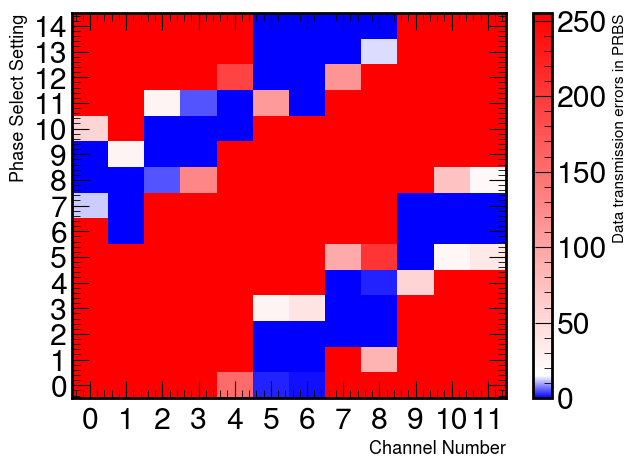

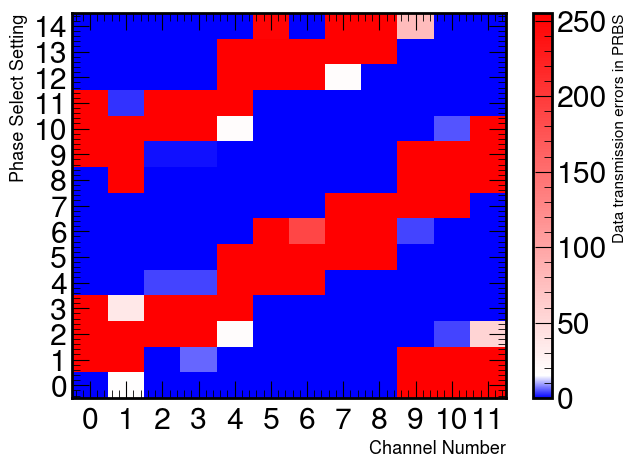

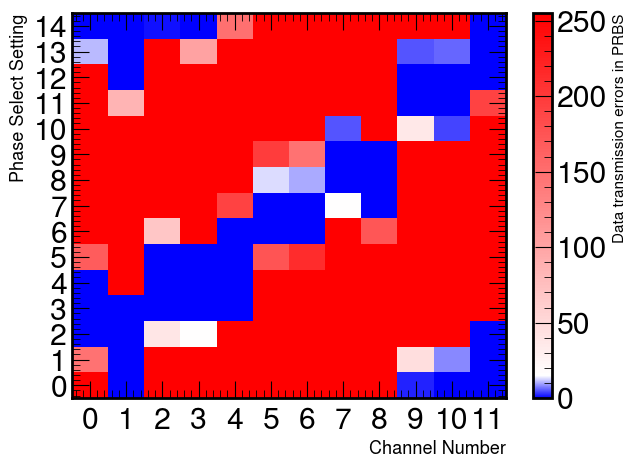

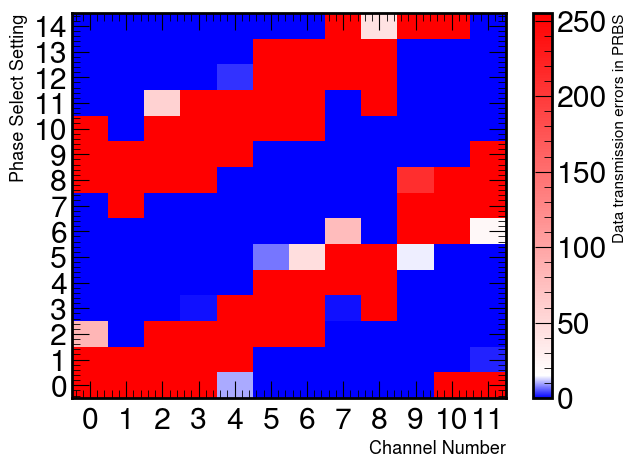

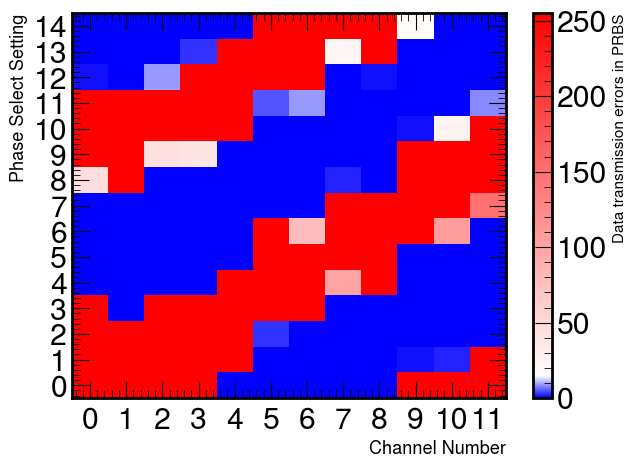

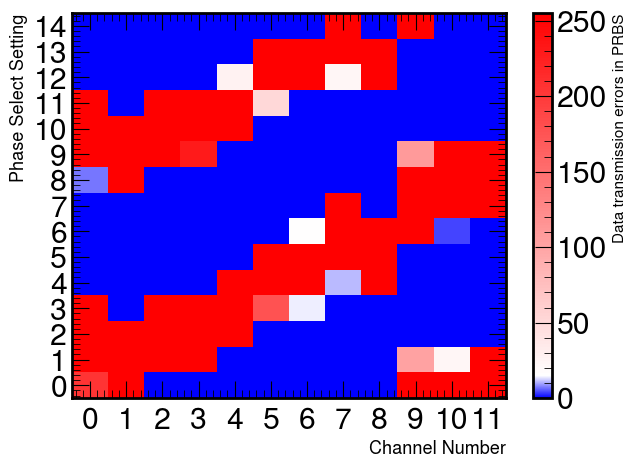

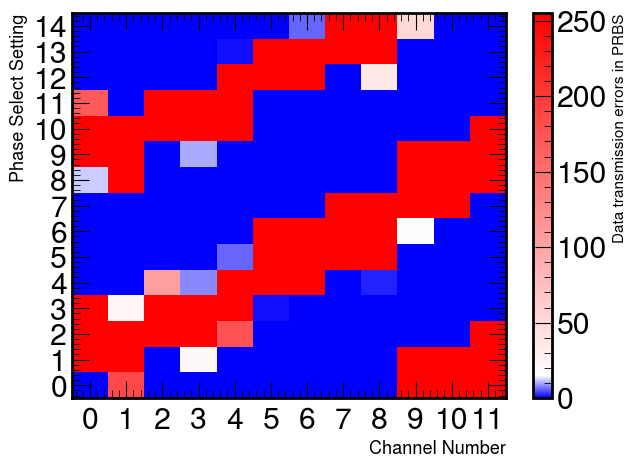

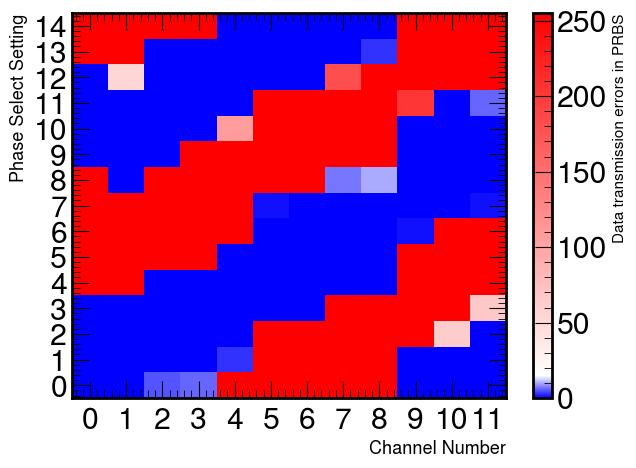

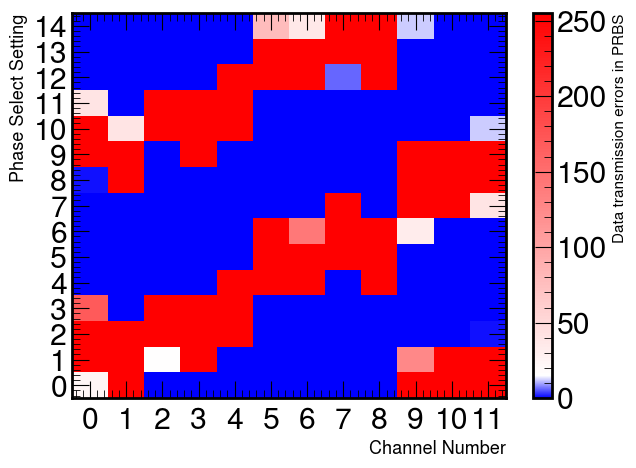

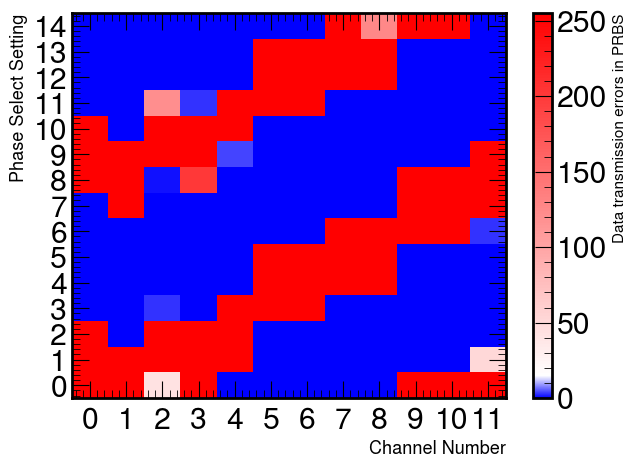

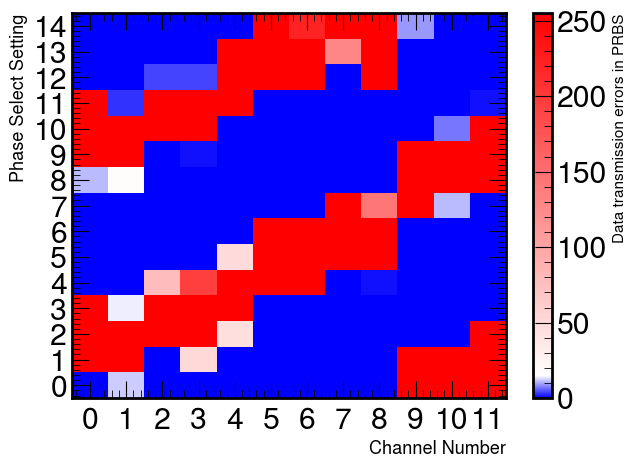

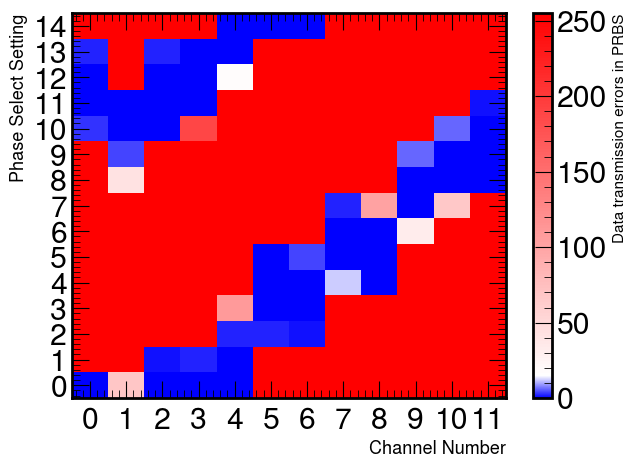

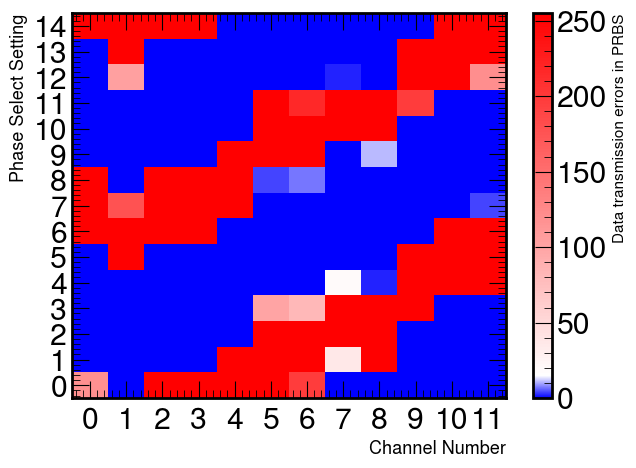

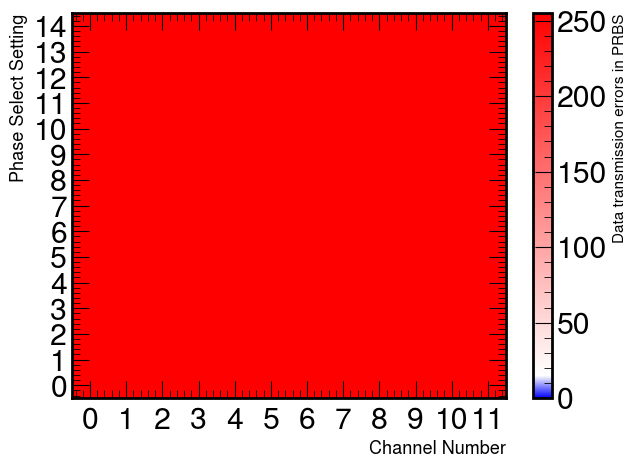

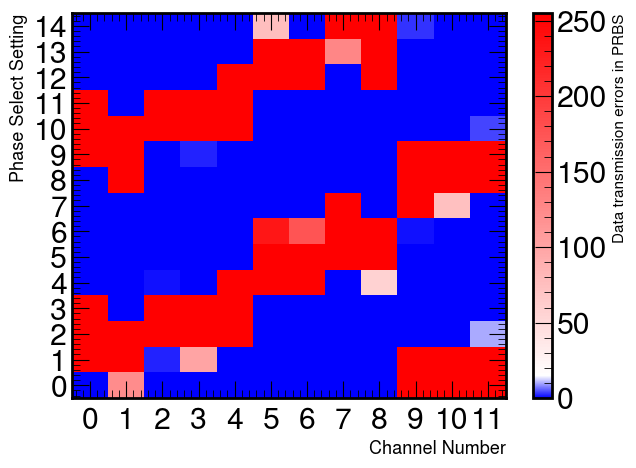

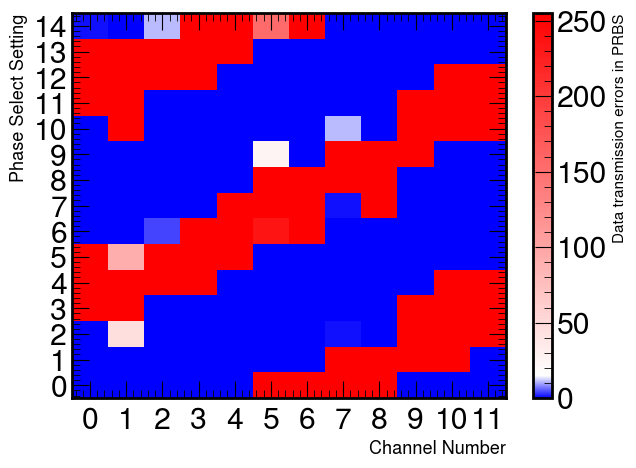

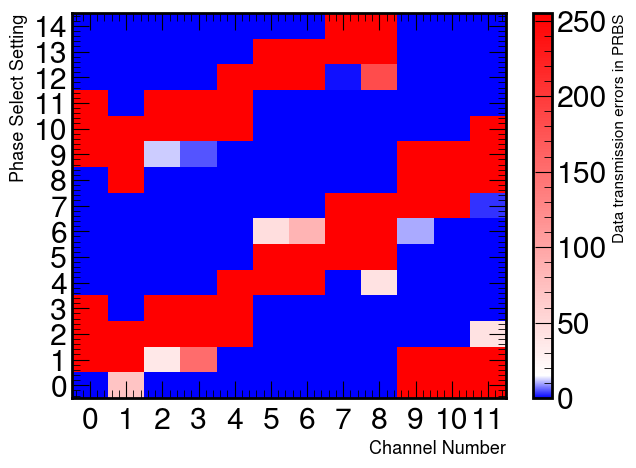

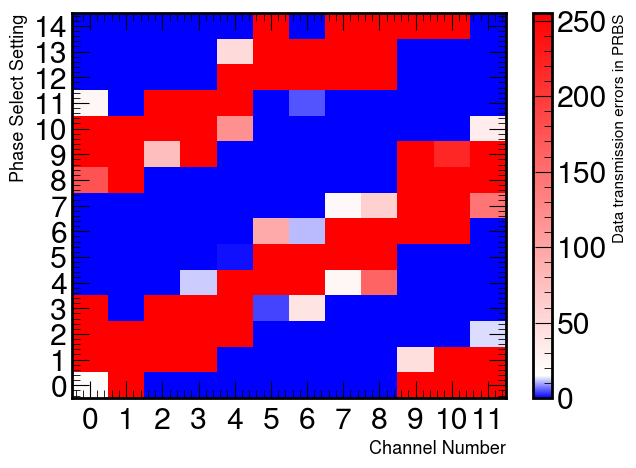

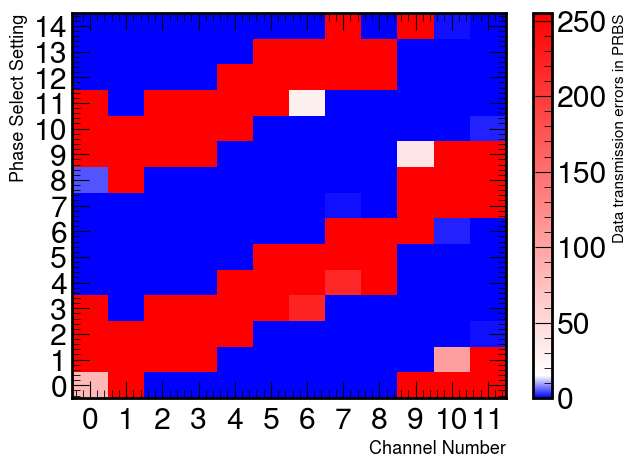

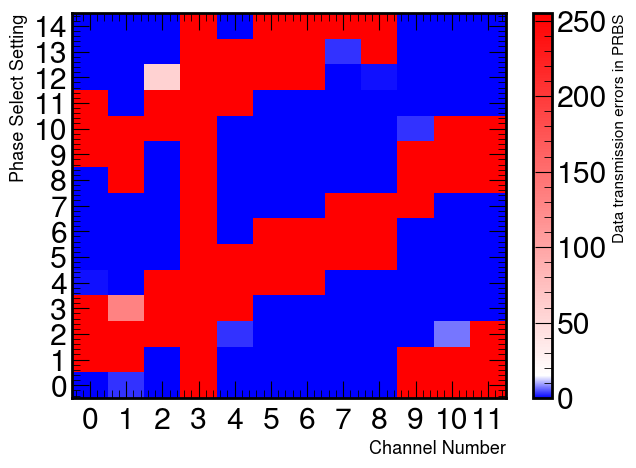

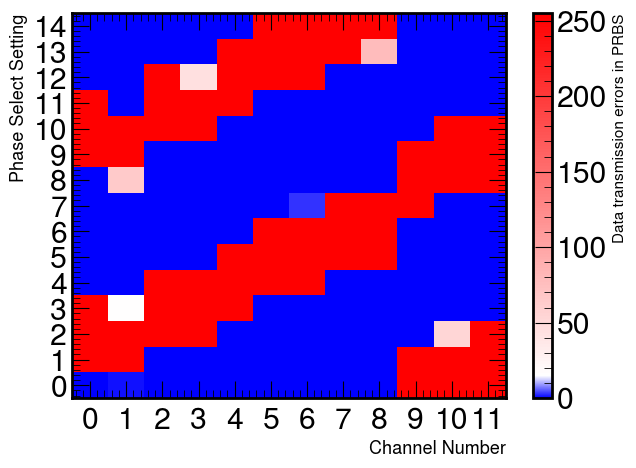

In [12]:
for i in range(len(erx_errcounts)):
    fig,ax=plt.subplots(figsize=(7,5))
    data = erx_errcounts[i]
    ## plots the transmission errors rate; change the directory to save the plot
    a,b=np.meshgrid(np.arange(12),np.arange(15))
    norm = mcolors.TwoSlopeNorm(vmin = 0, vmax = 255, vcenter = 15)

    h=plt.hist2d(a.flatten(),b.flatten(),weights=data.flatten(),bins=(np.arange(13)-.5,np.arange(16)-.5),cmap='bwr',norm=norm,figure=fig);
    cb=fig.colorbar(h[3])
    cb.set_label(label='Data transmission errors in PRBS',size=11)
    cb.ax.set_yscale('linear')

    plt.ylabel('Phase Select Setting', size=13)
    plt.xlabel('Channel Number', size=13)
    plt.xticks(np.arange(12))
    plt.yticks(np.arange(15))
    plt.savefig(f'/Users/alexcampbell/documents/research/Fermilab/packaged_Sep_21_2023/plots/prbs/chip_{i}_phase_scan.png', dpi=300, facecolor = "w")


# eTx Results

In [56]:
etx_delays = []
etx_bitcounts = []
etx_errcounts = []
for i in range(len(data)):
    for j in range(len(data[i]['tests'])):
        if 'metadata' in data[i]['tests'][j]:
            if "test_io.py::test_eTX_delayscan" in data[i]['tests'][j]['nodeid']:
                
                etx_delays.append(data[i]['tests'][j]['metadata']['eTX_delays'])
                etx_bitcounts.append(data[i]['tests'][j]['metadata']['eTX_bitcounts'])
                etx_errcounts.append(data[i]['tests'][j]['metadata']['eTX_errcounts'])
etx_delays = np.array(etx_delays)
etx_bitcounts = np.array(etx_bitcounts)
etx_errcounts = np.array(etx_errcounts)
etx_rate = etx_errcounts / etx_bitcounts

/var/folders/pj/jdsydbt93y3fty8bxll08bd00000gn/T/ipykernel_7456/1394231010.py:15: RuntimeWarning: invalid value encountered in true_divide
  etx_rate = etx_errcounts / etx_bitcounts


In [48]:
def get_max_width(err_counts, num_channels: int, padding: int):
    """                                                                                                                                                                                                   
    Get maximum width of error-free region in bathtub curve                                                                                                                                               
    :param err_counts: Array with error counts for each possible phase setting                                                                                                                            
    :type err_counts: np.array                                                                                                                                                                            
    :param num_channels: Number of channels (12 for ePortRx, 6 for ECON-D eTx, 13 for ECON-T eTx)                                                                                                         
    :type num_channels: int                                                                                                                                                                               
    :param padding: Padding needed to complete two eye diagrams (4 for ePortRx, 10 for ECON-T eTx)                                                                                                        
    :type padding: int                                                                                                                                                                                    
    """

    def _consecutive(data, stepsize=1):
        return np.split(data, np.where(np.diff(data) != stepsize)[0] + 1)

    max_width_by_ch = []
    second_max_width_by_ch = []
    err_wrapped = np.concatenate([err_counts, err_counts[:padding]])

    for ch in range(num_channels):
        x = err_wrapped[:, ch]

        phases = _consecutive(np.argwhere(x == 0).flatten())
        sizes = [np.size(a) for a in phases]
        max_width = max(sizes)
        sizes.remove(max_width)
        try:
            second_max_width = max(sizes)
        except:
            second_max_width = 0
        max_width_by_ch.append(max_width)
        second_max_width_by_ch.append(second_max_width)

    max_width_by_ch = np.array(max_width_by_ch)
    second_max_width_by_ch = np.array(second_max_width_by_ch)

    return max_width_by_ch, second_max_width_by_ch



In [53]:
etx_maxwidth= []
etx_secondmaxwidth = []
for i in range(len(etx_errcounts)):
    max_width, second_max_width = get_max_width(etx_errcounts[i].T, num_channels=6, padding=10)
    etx_maxwidth.append(max_width)
    etx_secondmaxwidth.append(second_max_width)

In [ ]:
for i in range(len(etx_rate)):
    fig,ax=plt.subplots(figsize=(7,5))
    new_array = etx_rate[i]
    ## plots the transmission errors rate; change the directory to save the plot
    a,b=np.meshgrid(np.arange(6),np.arange(63))
    norm = mcolors.TwoSlopeNorm(vmin = 0, vmax = 1, vcenter = 0.0001)

    h=plt.hist2d(a.flatten(),b.flatten(),weights=new_array.T.flatten(),bins=(np.arange(7),np.arange(64)),cmap='bwr',norm=norm);
    cb=fig.colorbar(h[3])
    cb.set_label(label='Transmission errors rate',size=11)
  

    plt.ylabel('Delay Select Setting', size=13)
    plt.xlabel('Channel Number', size=13)
    plt.savefig(f'/Users/alexcampbell/documents/research/Fermilab/packaged_Sep_21_2023/plots/delay/chip_{i}_delay_scan.png', dpi=300, facecolor = "w")


In [112]:
etx_maxwidth = np.array(etx_maxwidth)
etx_secondmaxwidth = np.array(etx_secondmaxwidth)

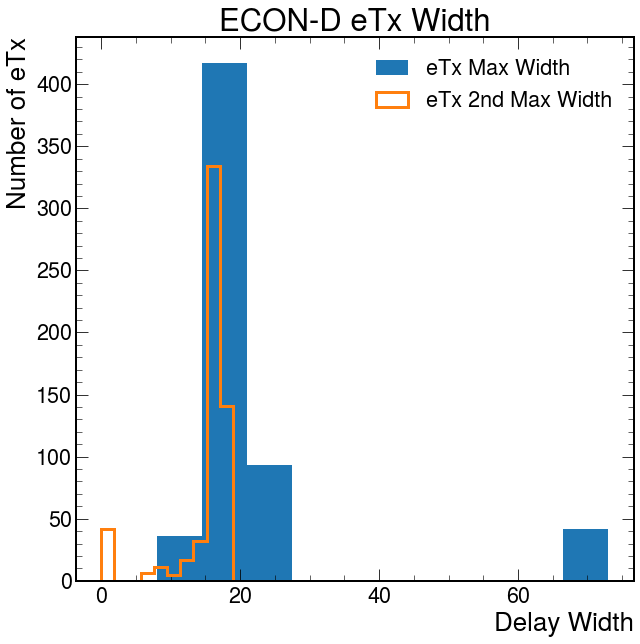

In [114]:
temp = etx_maxwidth.flatten()
temp1 = etx_secondmaxwidth.flatten()
plt.hist(temp, label = "eTx Max Width")
plt.hist(temp1, linewidth = 3, histtype = 'step', label = "eTx 2nd Max Width")
plt.xlabel("Delay Width")
plt.ylabel("Number of eTx")
plt.title("ECON-D eTx Width")
plt.legend(loc= "upper right")
plt.savefig(f'/Users/alexcampbell/documents/research/Fermilab/packaged_Sep_21_2023/plots/delay/distribution_of_eTx_widths.png', dpi=300, facecolor = "w")

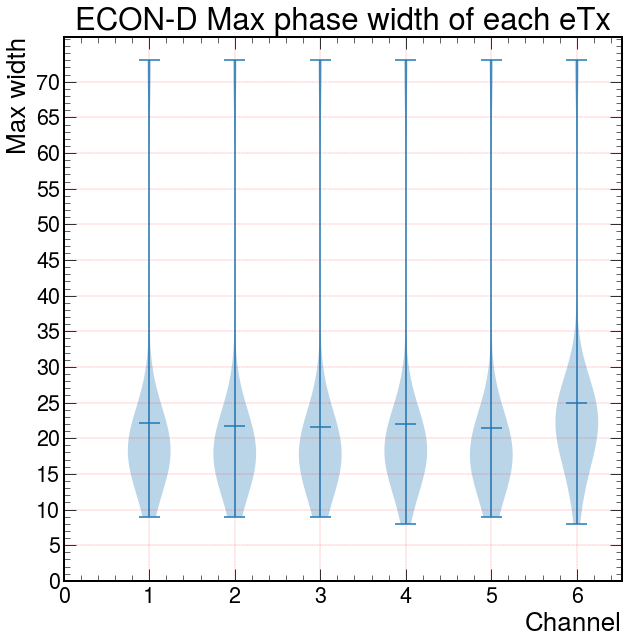

In [118]:
ch1 = etx_maxwidth[:,0]
ch2 = etx_maxwidth[:,1]
ch3 = etx_maxwidth[:,2]
ch4 = etx_maxwidth[:,3]
ch5 = etx_maxwidth[:,4]
ch6 = etx_maxwidth[:,5]

temp = [ch1,ch2,ch3,ch4,ch5,ch6]
plt.violinplot(temp, showmeans=True, showextrema=True)
plt.xticks(range(7), ['0','1', '2', '3' ,'4', '5', '6'])
plt.title("ECON-D Max phase width of each eTx")
plt.yticks(np.arange(0,75,5))
plt.grid(color='r', linestyle='--', linewidth=.3)
# Set the y-axis label
plt.ylabel('Max width')
plt.xlabel('Channel')
plt.savefig(f'/Users/alexcampbell/documents/research/Fermilab/packaged_Sep_21_2023/plots/delay/max_width_volin_of_all_eTx.png', dpi=300, facecolor = "w")


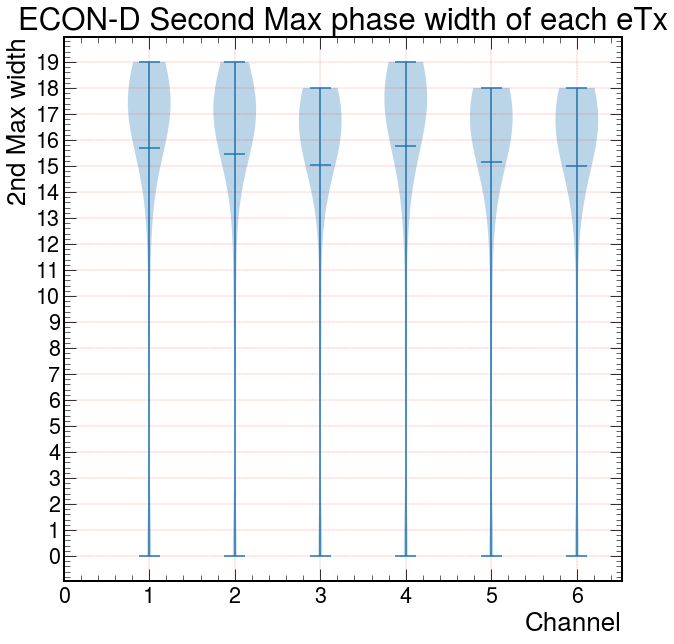

In [121]:
ch1 = etx_secondmaxwidth[:,0]
ch2 = etx_secondmaxwidth[:,1]
ch3 = etx_secondmaxwidth[:,2]
ch4 = etx_secondmaxwidth[:,3]
ch5 = etx_secondmaxwidth[:,4]
ch6 = etx_secondmaxwidth[:,5]

temp = [ch1,ch2,ch3,ch4,ch5,ch6]
plt.violinplot(temp, showmeans=True, showextrema=True)
plt.xticks(range(7), ['0','1', '2', '3' ,'4', '5', '6'])
plt.title("ECON-D Second Max phase width of each eTx")
plt.yticks(np.arange(0,20,1))
plt.grid(color='r', linestyle='--', linewidth=.3)
# Set the y-axis label
plt.ylabel('2nd Max width')
plt.xlabel('Channel')
plt.savefig(f'/Users/alexcampbell/documents/research/Fermilab/packaged_Sep_21_2023/plots/delay/second_max_width_volin_of_all_eTx.png', dpi=300, facecolor = "w")


# PLL Result

In [126]:
min_freq = []
max_freq = []
for i in range(len(data)):
    for j in range(len(data[i]['tests'])):
        if 'metadata' in data[i]['tests'][j]:
            if "test_pll_freq.py::test_pllautolock" in data[i]['tests'][j]['nodeid']:
                min_freq.append(data[i]['tests'][j]['metadata']['min_freq'])
                max_freq.append(data[i]['tests'][j]['metadata']['max_freq'])
max_freq = np.array(max_freq)
min_freq = np.array(min_freq)

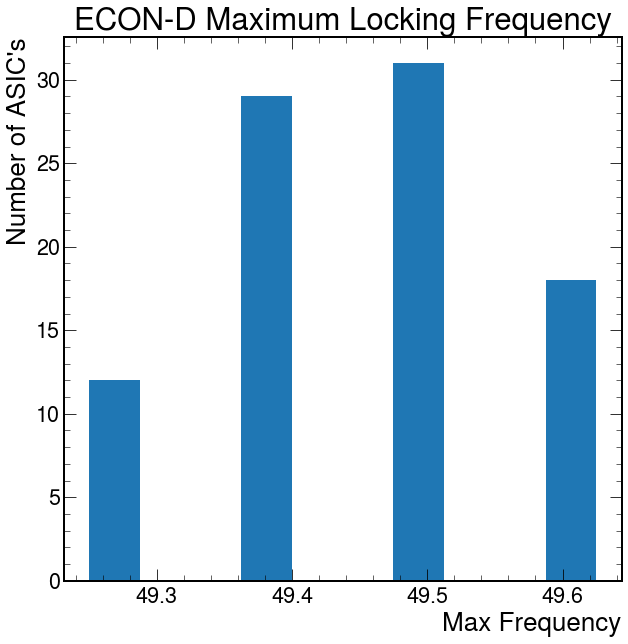

In [130]:
temp = max_freq
temp1 = min_freq
plt.hist(temp, label = "eTx Max Width")
#plt.hist(temp1, linewidth = 3, histtype = 'step', label = "eTx 2nd Max Width")
plt.xlabel("Max Frequency")
plt.ylabel("Number of ASIC's")
plt.title("ECON-D Maximum Locking Frequency")

plt.savefig(f'/Users/alexcampbell/documents/research/Fermilab/packaged_Sep_21_2023/plots/pll/distribution_of_max_freq.png', dpi=300, facecolor = "w")

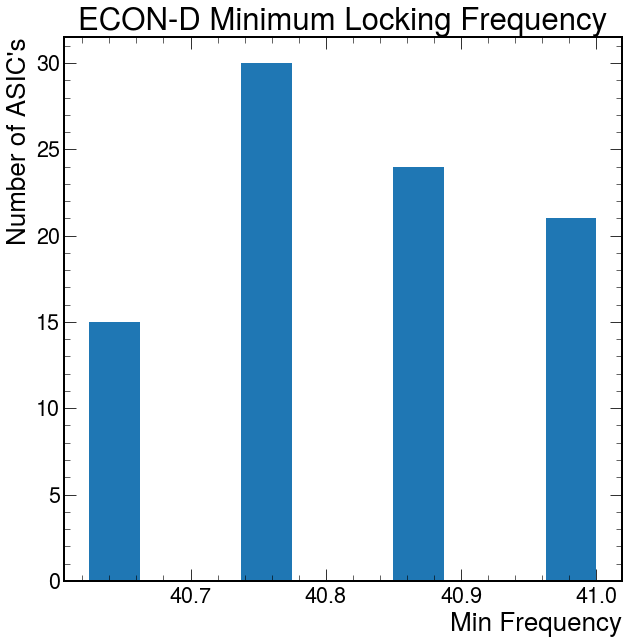

In [131]:
temp = min_freq

plt.hist(temp, label = "eTx Max Width")
#plt.hist(temp1, linewidth = 3, histtype = 'step', label = "eTx 2nd Max Width")
plt.xlabel("Min Frequency")
plt.ylabel("Number of ASIC's")
plt.title("ECON-D Minimum Locking Frequency")

plt.savefig(f'/Users/alexcampbell/documents/research/Fermilab/packaged_Sep_21_2023/plots/pll/distribution_of_min_freq.png', dpi=300, facecolor = "w")

In [14]:
temp = jsonload('/Users/alexcampbell/documents/research/Fermilab/packaged_Sep_21_2023/board1.json')

In [27]:
c = np.array(temp['tests'][30]['metadata']['eRX_errcounts'])

In [28]:
c

array([[  0,  50,   0,   0,   0,   0,   0,   0,   0, 255, 255, 255],
       [255, 255,   0, 134,   0,   0,   0,   0,   0, 255, 255, 255],
       [255, 255, 255, 255, 255,   0,   0,   0,   0,   0,   0, 241],
       [255,   0, 255, 255, 255,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,  34,  21, 255, 255, 255,   0,   6,   0,   0,   0],
       [  0,   0,   0,   0,   0, 255, 255, 255, 255,   0,   0,   0],
       [  0,   0,   0,   0,   0, 255,  90, 255, 255,   1,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 255, 255, 255, 255,   4],
       [  0, 238,   0,   0,   0,   0,   0,   0,   0, 255, 255, 255],
       [255, 255,   0,  27,   0,   0,   0,   0,   0, 255, 255, 255],
       [255, 255, 255, 255, 255,   0,   0,   0,   0,   0,   0,  13],
       [255,   0, 255, 255, 255,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 255, 255, 255,   0, 191,   0,   0,   0],
       [  0,   0,   0,   0,   1, 255, 255, 255, 255,   0,   0,   0],
       [  0,   0,   0,   0,   0, 2